# $k$-Vecinos más cercanos

- El algoritmo `vecino más cercano` es considerado uno de los `más simples dentro del aprendizaje automático`. Su enfoque consiste en `memorizar el conjunto de entrenamiento y luego predecir la etiqueta del vecino más cercano en dicho conjunto`. Este método se basa en la idea de que las `características utilizadas para describir los puntos en el dominio son relevantes para determinar sus etiquetas`, de manera que es probable que `puntos cercanos tengan la misma etiqueta`. Incluso en situaciones donde el conjunto de entrenamiento es muy grande, es posible encontrar un vecino más cercano, como por ejemplo cuando el `conjunto de entrenamiento abarca toda la Web y las distancias se basan en enlaces`. 

- A diferencia de otros paradigmas algorítmicos que requieren hipótesis predefinidas, el método del `vecino más cercano calcula una etiqueta para cualquier punto de prueba sin buscar un predictor dentro de una clase de funciones predefinida`. En este capítulo, se describen los métodos del `vecino más cercano` tanto para problemas de `clasificación` como de `regresión`, se analiza su rendimiento en clasificación binaria y se discute la eficacia de su aplicación.

## Análisis

```{prf:definition} $k$-NN (Clasificación)
:label: def_knn

- Sea $\mathcal{X}$ nuestro `dominio de instancia` (`conjunto de objetos que se desea etiquetar`), dotado con una métrica $\rho$. Es decir, $\rho:\mathcal{X}\times\mathcal{X}\longrightarrow\mathbb{R}$ es una  función que retorna la `distancia entre cualquier par de elementos` de $\mathcal{X}$. Por ejemplo, si $\mathcal{X}=\mathbb{R}^{d}$, entonces $\rho$ puede ser la `distancia Euclidiana`,

$$
\rho(\boldsymbol{x}, \boldsymbol{x}')=\|\boldsymbol{x}-\boldsymbol{x}'\|=\sqrt{\sum_{i=1}^{d}(x_{i}-x_{i}')^{2}}.
$$

- Sea $S=(\boldsymbol{x}_{1}, y_{1}),\dots,(\boldsymbol{x}_{m}, y_{m})$ una secuencia de `ejemplos de entrenamiento` y $\mathcal{Y}$, el `conjunto de etiquetas`, usualmente: $\{0, 1\},~\{-1, +1\}$ o $\mathbb{R}$. Para cada $\boldsymbol{x}\in\mathcal{X}$, sea $\pi_{1}(\boldsymbol{x}),\dots,\pi_{m}(\boldsymbol{x})$ una `reordenación` de $\{1,\dots,m\}$ en función de su distancia a $\boldsymbol{x}$, $\rho(\boldsymbol{x}, \boldsymbol{x}_{i})$. Esto es, para todo $i<m$,

$$
\rho(\boldsymbol{x}, \boldsymbol{x}_{\pi_{i}(\boldsymbol{x})})\leq\rho(\boldsymbol{x}, \boldsymbol{x}_{\pi_{i+1}(\boldsymbol{x})}).
$$

- Para un número $k$, la regla $k$-NN para la `clasificación binaria` se define del siguiente modo:

    - `input`: muestra de `entrenamiento` $S=(\boldsymbol{x}_{1}, y_{1}),\dots,(\boldsymbol{x}_{m}, y_{m})$
    - `output`: $\forall~\boldsymbol{x}\in\mathcal{X}$, `etiqueta mayoritaria` en $\{y_{\pi_{i}(\boldsymbol{x})}:~i\leq k\}$
```

```{figure} ./imgs/knn_classification.png
:name: knn_classification_fig
:align: center
:scale: 90

Clasificación usando $k$-NN para $k=3$. Source: kdnuggets.com.
```

- Definamos por $h_{S}(\boldsymbol{x})$ la `regla de predicción` (el subíndice $S$ hace hincapié en el hecho de que `el predictor de salida depende de` $S$). Esta función también se denomina `predictor, hipótesis o clasificador`. El `predictor` puede utilizarse para predecir la etiqueta de nuevos puntos de dominio. Cuando $k=1$ (ver {prf:ref}`def_knn`), tenemos la regla $1$-NN:

$$
h_{S}(\boldsymbol{x})=y_{\pi_{1}(\boldsymbol{x})}.
$$

- Nótese que hemos considerado la `métrica Euclideana` en esta definición, pero, `dependiendo del conjunto de datos, podría ser mas adecuado utilizar una métrica diferente` (ver [Manhatan](https://es.wikipedia.org/wiki/Geometr%C3%ADa_del_taxista), [Minkowski](https://en.wikipedia.org/wiki/Minkowski_distance)). Esto es, una métrica alternativa, podría `mejorar los errores cometidos por el clasificador`.

```{prf:definition} $k$-NN (Regresión)
:label: def_knn_reg

- Para `problemas de regresión`, a saber, $\mathcal{Y}=\mathbb{R}$, se puede definir la `regla de predicción` como la `media objetivo` de los $k$ vecinos más cercanos. Esto es,

$$
h_{S}(\boldsymbol{x})=\frac{1}{k}\sum_{i=1}^{k}y_{\pi_{i}(\boldsymbol{x})}.
$$

- Más en general, para alguna función $\phi:~(\mathcal{X}, \mathcal{Y})^{k}\rightarrow\mathcal{Y}$, la regla $k$-NN con respecto a $\phi$ es:

$$
h_{S}(\boldsymbol{x})=\phi((\boldsymbol{x}_{\pi_{1}(\boldsymbol{x})}, y_{\pi_{1}(\boldsymbol{x})}),\dots,(\boldsymbol{x}_{\pi_{k}(\boldsymbol{x})}, y_{\pi_{k}(\boldsymbol{x})})).
$$(knn_regeq)

- Se puede verificar que podemos lanzar la predicción por mayoría de etiquetas (`clasificación`) o por el objetivo promediado (`regresión`) como en la Ecuación {eq}`knn_regeq` mediante una `elección adecuada de` $\phi$.

- La generalidad puede llevar a otras reglas, por ejemplo, si $\mathcal{Y}=\mathbb{R}$, podemos tomar una `media ponderada de los objetivos según la distancia a` $x$

$$
h_{S}(\boldsymbol{x})=\sum_{i=1}^{k}\frac{\rho(\boldsymbol{x}, \boldsymbol{x}_{\pi_{i}(\boldsymbol{x})})}{\sum_{j=1}^{k}\rho(\boldsymbol{x}, \boldsymbol{x}_{\pi_{j}(\boldsymbol{x})})}y_{\pi_{i}(\boldsymbol{x})}.
$$
```

```{prf:definition} Error empírico y verdadero revisado
:label: def_emp_error

- Para una `distribución de probabilidad`, $\mathcal{D}$, sobre $\mathcal{X}\times\mathcal{Y}$, se puede medir la probabilidad de que $h$ `cometa un error` cuando los puntos etiquetados se extraen aleatoriamente según $\mathcal{D}$. Redefinimos el `error verdadero (o riesgo)` de una regla de predicción $h$ como

$$
L_{\mathcal{D}}(h):=\underset{(\boldsymbol{x},y)\sim\mathcal{D}}{\mathbb{P}}[h(\boldsymbol{x})\neq y]:=\mathcal{D}(\{(\boldsymbol{x},y):~h(\boldsymbol{x})\neq y\}).
$$(real_error)

- **`Minimización Empírica de Riesgo (ERM)`**. Nos gustaría encontrar un `predictor`, $h$, para el que se `minimizara el error` $L_{\mathcal{D}}(h)$ sobre una `clase de hipótesis` denota por $\mathcal{H}$, esto es: $ERM_{\mathcal{H}}(S)\in\underset{h\in\mathcal{H}}{\text{argmin}}L_{S}(h)$. Cada $h\in\mathcal{H}$ es una función de $\mathcal{X}$ a $\mathcal{Y}$. 

- Sin embargo, no se conocen los datos que generan $\mathcal{D}$. A lo que sí se tiene acceso es a los `datos de entrenamiento`, $S$. Una noción útil de error que puede calcular es el `error de entrenamiento (riesgo empírico)`, es decir, el `error en el que incurre el clasificador sobre la muestra de entrenamiento`:

$$
L_{S}(h):=\frac{|\{i\in\left[m\right]:~h(\boldsymbol{x}_{i})\neq y_{i}\}|}{m},~\left[m\right]=\{1,\dots,m\}.
$$

- Dado $S$, y un `aprendizaje`, se puede calcular $L_{S}(h)$ para cualquier función $h:X\rightarrow\{0,1\}$.

- Deseamos encontrar alguna hipótesis, $h : X\rightarrow Y$, que (probablemente de forma aproximada) `minimice el riesgo verdadero`,$L_{D}(h)$.

- `Predictor óptimo de Bayes.` Dada cualquier distribución de probabilidad $\mathcal{D}$ sobre $\mathcal{X}\times\{0, 1\}$, la `mejor función de predicción de etiquetas` de $\mathcal{X}$ a $\{0, 1\}$ será

$$
f_{\mathcal{D}}(x)=
\begin{cases}
1,&\text{si}~\mathbb{P}[y=1|x]\geq1/2\\
0,&\text{otro caso}
\end{cases}
$$ (bayes_opt_pred)

- Se puede verificar que `para toda distribución de probabilidad` $\mathcal{D}$, `el predictor óptimo de Bayes` $f_{D}$ `es óptimo`, en el sentido de que `ningún otro clasificador`, $g : \mathcal \rightarrow\{0, 1\}$, `tiene un error menor`. Es decir, para cada clasificador $g, L_{\mathcal{D}}(f_{\mathcal{D}}) \leq L_{\mathcal{D}}(g)$.
```

```{prf:definition} Funciones de pérdidas generalizadas
:label: gen_loss_fun

- Dado cualquier conjunto $\mathcal{H}$ (que desempeña el papel de nuestras `hipótesis, o modelos`) y algún `dominio` $Z$ sea $\ell$ cualquier función de $\mathcal{H}\times Z$ al conjunto de los números reales no negativos, $\ell: \mathcal{H}\times Z\rightarrow\mathbb{R}^{+}$. Llamamos a estas funciones, `funciones de pérdida`.

- Nótese que para los problemas de predicción, tenemos que $Z = \mathcal{X}\times\mathcal{Y}$. Sin embargo, nuestra noción de la `función de pérdida` se generaliza más allá de las tareas de predicción y, por tanto, permite que $Z$ sea `cualquier dominio de ejemplos`.

- Definimos ahora la `función de riesgo` como la `pérdida esperada de un clasificador`, $h\in\mathcal{H}$, con respecto a la distribución de probabilidad $\mathcal{D}$ sobre $Z$, a saber,

$$
L_{\mathcal{D}}(h):=\underset{z\sim\mathcal{D}}{\mathbb{E}}[\ell(h, z)].
$$(risk_function)

- Es decir, consideramos la `esperanza de la pérdida de` $h$ `sobre los objetos` $z$ `elegidos aleatoriamente de acuerdo con` $\mathcal{D}$. Del mismo modo, definimos el `riesgo empírico` como la pérdida esperada sobre una muestra dada $S=(z_{1},\dots,z_{m})\in Z^{m}$, a saber

$$
L_{S}(h):=\frac{1}{m}\sum_{i=1}^{m}\ell(h, z_{i}).
$$

- `Ejemplos`: Dada una variable aleatoria $z$ que abarca el conjunto de pares $\mathcal{X}\times\mathcal{Y}$, definimos las siguientes `funciones de pérdida`

$$
\begin{align}
\text{0-1 Loss}:&~\ell_{\text{0-1}}(h, (x,y)):=
\begin{cases}
0, & \text{si}~ h(x)=y\\[2mm]
1, & \text{si}~ h(x)\neq y
\end{cases}\\
\text{Square Loss}:&~\ell_{\text{sq}}(h, (x,y)):=(h(x)-y)^{2}.
\end{align}
$$

- $\ell_{\text{0-1}}(h, (x,y))$ se utiliza en `problemas de clasificación binaria o multiclase`. Hay que tener en cuenta que, para una variable aleatoria, $\alpha$, que toma los valores $\{0,1\}$,

    $$\mathbb{E}_{\alpha\sim\mathcal{D}}[\alpha] = \mathbb{P}_{\alpha\sim\mathcal{D}}[\alpha = 1].$$
    
    Por lo tanto, las funciones de pérdida definidas en Eq. {eq}`risk_function` y Eq. {eq}`real_error` son equivalentes.
```

```{prf:observation} $1$-NN
:label: knn_analysis

- Dado que las reglas NN son `métodos de aprendizaje tan naturales`, sus propiedades de generalización han sido ampliamente estudiadas. La mayoría de los resultados anteriores son resultados de `consistencia asintótica`, que analizan el rendimiento de las reglas NN cuando el tamaño de la muestra, $m$, tiende a $\infty$, y la `tasa de convergencia depende de la distribución subyacente`. 

- Estamos interesados en `aprendizajes de muestras de entrenamiento finitas` y entender el `rendimiento de generalización` en función del `tamaño de esos conjuntos de entrenamiento finitos` y de `supuestos previos claros sobre la distribución de los datos`. Por lo tanto, presentamos un análisis de `muestras finitas de la regla 1-NN`.

```

```{admonition} Generalización de la regla $1$-NN

- Ahora analizamos el `error verdadero` de la regla $1$-NN para la `clasificación binaria` con `función pérdida` $0-1$ a saber, $\mathcal{Y}=\{0, 1\}$ y $\ell(h, (\boldsymbol{x}, y))=\mathbb{1}_{[h(\boldsymbol{x})\neq y]}$. También supondremos en todo el análisis que $\mathcal{X} = [0,1]^{d}$ y $\rho$ es la `distancia euclidiana`.

- Empezaremos introduciendo algunos notaciones. Sea $\mathcal{D}$ una distribución sobre $\mathcal{X}\times\mathcal{Y}$. Denotemos por $\mathcal{D}_{\mathcal{X}}$ la `distribución marginal inducida por` $\mathcal{X}$ y sea $\eta:\mathbb{R}^{d}\rightarrow\mathbb{R}$ la `probabilidad condicional sobre las etiquetas`, esto es,

$$
\eta(\boldsymbol{x})=\mathbb{P}[y=1|\boldsymbol{x}].
$$

- La `regla óptima de Bayes` (es decir, la hipótesis que minimiza $L_{\mathcal{D}}(h)$ sobre todas las funciones $h\in\mathcal{H}$, ver Eq. {eq}`bayes_opt_pred`) es

$$
h^{\star}(\boldsymbol{x})=\mathbb{1}_{\left[\eta(\boldsymbol{x})>1/2\right]}.
$$

- Suponemos que la función de `probabilidad condicional` $\eta$ es $c$-Lipschitz (ver [Lipschitz continuity](https://en.wikipedia.org/wiki/Lipschitz_continuity)) para algún valor de $c>0$. Es decir, $\forall~\boldsymbol{x}, \boldsymbol{x}'\in\mathcal{X},~|\eta(\boldsymbol{x})-\eta(\boldsymbol{x}')|\leq c\|\boldsymbol{x}-\boldsymbol{x}'\|$. En otras palabras, esto significa que `si dos vectores están próximos, es probable que sus etiquetas sean las mismas`.
```

```{admonition} Nota
:class: tip
El siguiente lema aplica la `Lipschitzness` de la función de `probabilidad condicional` para acotar el `error verdadero` de la regla `1-NN` en función de la distancia entre cada `instancia de prueba` y su `vecino más cercano en el conjunto de entrenamiento`.
```

```{prf:lemma} 
:label: knn_lemma1

Sea $\mathcal{X}=[0,1]^{d},~ \mathcal{Y}=\{0,1\}$, y $\mathcal{D}$ una distribución sobre $\mathcal{X}\times\mathcal{Y}$, para la cual, la `función de probabilidad condicional`, $\eta$, es una `función` $c$`-Lipschitz`. Sea $S=(\boldsymbol{x}_{1}, y_{1}),\dots,(\boldsymbol{x}_{m}, y_{m})$ una muestra `iid` y sea $h_{S}$ su correspondiente `hipótesis` $1$-NN. Sea $h^{\star}$ la `regla óptima de Bayes` para $\eta$. Entonces,

$$
\underset{S\sim\mathcal{D}^{m}}{\mathbb{E}}[L_{\mathcal{D}}(h_{S})]\leq 2 L_{\mathcal{D}}(h^{\star})+c\underset{S\sim\mathcal{D}^{m}, \boldsymbol{x}\sim\mathcal{D}}{\mathbb{E}}[\|\boldsymbol{x}-\boldsymbol{x}_{\pi_{1}(\boldsymbol{x})}\|].
$$
```

**`Demostración`**

- Dado que $L_{\mathcal{D}}(h_{S}):=\mathbb{E}_{(\boldsymbol{x}, y)\sim\mathcal{D}}(\ell(h, (\boldsymbol{x}, y)))=\mathbb{E}_{(\boldsymbol{x}, y)\sim\mathcal{D}}(\mathbb{1}_{[h(\boldsymbol{x})\neq y]})$, entonces $\mathbb{E}(L_{\mathcal{D}}(h_{S})))$ es la `probabilidad de muestrear un conjunto de entrenamiento` $S$ y un `ejemplo adicional` $(\boldsymbol{x}, y)$ tal que, la etiqueta de $\boldsymbol{x}_{\pi_{1}(\boldsymbol{x})}$ es diferente de $y$.

- En otras palabras, podemos primero `muestrear` $m$ `ejemplos no etiquetados`, $S_{x}=(x_{1}, x_{2},\dots,x_{m})$, de acuerdo a $\mathcal{D}_{x}$, `y un nuevo ejemplo no etiquetado adicional`, $\boldsymbol{x}\sim\mathcal{D}_{x}$. Luego encontramos $\boldsymbol{x}_{\pi_{1}(\boldsymbol{x})}$ que es el `vecino mas cercano a` $\boldsymbol{x}$ en $S_{\boldsymbol{x}}$, y finalmente muestrear: $y\sim\eta(\boldsymbol{x})$ y $y_{\pi_{1}(\boldsymbol{x})}\sim\eta(\boldsymbol{x}_{\pi_{1}(\boldsymbol{x})})$, donde $\eta$ es la `probabilidad condicional asociada a la distribución marginal` sobre $\mathcal{X},~\mathcal{D}_{x}$.

- Entonces

$$
\begin{align*}
\mathbb{E}_{S\sim\mathcal{D}^{m}}(L_{\mathcal{D}}(h_{S}))&=\underset{S_{x}\sim\mathcal{D}_{x}^{m}, x\sim\mathcal{D}_{x}, y\sim\eta(x), y_{\pi_{1}(x)}\sim\eta(\boldsymbol{x}_{\pi_{1}(\boldsymbol{x})})}{\mathbb{E}}(\mathbb{1}_{[h(\boldsymbol{x})\neq y\cap h(\boldsymbol{x})\neq y_{\pi_{1}(\boldsymbol{x})}]})\\
&=\underset{S_{x}\sim\mathcal{D}_{x}^{m}, x\sim\mathcal{D}_{x}, y\sim\eta(x), y_{\pi_{1}(x)}\sim\eta(\boldsymbol{x}_{\pi_{1}(\boldsymbol{x})})}{\mathbb{E}}(\mathbb{1}_{[y\neq y_{\pi_{1}(\boldsymbol{x})}]})\\
&=\underset{S_{x}\sim\mathcal{D}_{x}^{m}, x\sim\mathcal{D}_{x}}{\mathbb{E}}\left(\underset{y\sim\eta(x), y_{\pi_{1}(x)}\sim\eta(\boldsymbol{x}_{\pi_{1}(\boldsymbol{x})})}{\mathbb{E}}(\mathbb{1}_{[y\neq y_{\pi_{1}(\boldsymbol{x})}]})\right)\\
&=\underset{S_{x}\sim\mathcal{D}_{x}^{m}, x\sim\mathcal{D}_{x}}{\mathbb{E}}\left(\underset{y\sim\eta(x), y_{\pi_{1}(x)}\sim\eta(\boldsymbol{x}_{\pi_{1}(\boldsymbol{x})})}{\mathbb{P}}(y\neq y_{\pi_{1}(\boldsymbol{x})})\right)\tag{$\star$}
\end{align*}
$$

- `Acotamos superiormente` a: $\underset{y\sim\eta(x), y_{\pi_{1}(x)}\sim\eta(\boldsymbol{x}_{\pi_{1}(\boldsymbol{x})})}{\mathbb{P}}(y\neq y_{\pi_{1}(\boldsymbol{x})}),~\forall~\boldsymbol{x}, \pi_{1}(\boldsymbol{x})\in\mathcal{D}$

- Definamos $y':=y_{\pi_{1}(\boldsymbol{x})},~x':=\boldsymbol{x}_{\pi_{1}(\boldsymbol{x})}$

$$
\begin{align*}
\underset{y\sim\eta(x), y_{\pi_{1}(x)}\sim\eta(\boldsymbol{x}_{\pi_{1}(\boldsymbol{x})})}{\mathbb{P}}(y\neq y_{\pi_{1}(\boldsymbol{x})})&=\mathbb{P}(y'=1|\boldsymbol{x}')\mathbb{P}(y=0|\boldsymbol{x})+\mathbb{P}(y'=0|\boldsymbol{x}')\mathbb{P}(y=1|\boldsymbol{x})\\
&=\mathbb{P}(y'=1|\boldsymbol{x}')(1-\mathbb{P}(y=1|\boldsymbol{x}))+(1-\mathbb{P}(y'=1|\boldsymbol{x}'))\mathbb{P}(y=1|\boldsymbol{x})\\[3mm]
&=\eta(\boldsymbol{x}')(1-\eta(\boldsymbol{x}))+(1-\eta(\boldsymbol{x}')\eta(\boldsymbol{x}))\\[3mm]
&=(\textcolor{red}{\eta(\boldsymbol{x})-\eta(\boldsymbol{x})}+\eta(\boldsymbol{x}'))(1-\eta(\boldsymbol{x}))+(1\textcolor{red}{-\eta(\boldsymbol{x})+\eta(\boldsymbol{x})}-\eta(\boldsymbol{x}'))\eta(\boldsymbol{x})\\[3mm]
&=2\eta(\boldsymbol{x})(1-\eta(\boldsymbol{x}))+(\eta(\boldsymbol{x})-\eta(\boldsymbol{x}'))(2\eta(\boldsymbol{x})-1)
\end{align*}
$$

- Dado que $\eta(\boldsymbol{x})=\mathbb{P}(y=1|\boldsymbol{x})\in[0, 1]$, entonces $|2\eta(\boldsymbol{x})-1|\leq 1$. En efecto:

$$
0\leq\eta(\boldsymbol{x})\leq 1\leq\Leftrightarrow 0\leq 2\eta(\boldsymbol{x})\leq 2\Leftrightarrow-1\leq 2\eta(\boldsymbol{x})-1\leq 1\Leftrightarrow|2\eta(\boldsymbol{x})-1|\leq1.
$$

- Dado que $\eta(\boldsymbol{x})$ es $c$`-Lipschitz`, entonces, $\forall~\boldsymbol{x},\boldsymbol{x}'\in\mathcal{X},~ |\eta(\boldsymbol{x})-\eta(\boldsymbol{x}')|\leq c\|\boldsymbol{x}-\boldsymbol{x}'\|$. Por lo tanto,

$$
\begin{align*}
\underset{y\sim\eta(x), y_{\pi_{1}(x)}\sim\eta(\boldsymbol{x}_{\pi_{1}(\boldsymbol{x})})}{\mathbb{P}}(y\neq y_{\pi_{1}(\boldsymbol{x})})&=|2\eta(\boldsymbol{x})(1-\eta(\boldsymbol{x}))+(\eta(\boldsymbol{x})-\eta(\boldsymbol{x}'))(2\eta(\boldsymbol{x})-1)|\\
&\leq|2\eta(\boldsymbol{x})(1-\eta(\boldsymbol{x}))|+|(\eta(\boldsymbol{x})-\eta(\boldsymbol{x}'))(2\eta(\boldsymbol{x})-1)|\\[3mm]
&\leq 2\eta(\boldsymbol{x})(1-\eta(\boldsymbol{x}))+|\eta(\boldsymbol{x})-\eta(\boldsymbol{x}')|\textcolor{red}{|2\eta(\boldsymbol{x})-1|}\\[3mm]
&\leq 2\eta(\boldsymbol{x})(1-\eta(\boldsymbol{x}))+c\|\boldsymbol{x}-\boldsymbol{x}'\|
\end{align*}
$$

- Reemplazando esta última desigualdad en ($\star$) se tiene que

$$
\begin{align*}
\underset{S_{x}\sim\mathcal{D}_{x}^{m}, x\sim\mathcal{D}_{x}}{\mathbb{E}}\left(\underset{y\sim\eta(x), y_{\pi_{1}(x)}\sim\eta(\boldsymbol{x}_{\pi_{1}(\boldsymbol{x})})}{\mathbb{P}}(y\neq y_{\pi_{1}(\boldsymbol{x})})\right)&\leq\underset{\mathcal{X}\sim\mathcal{D}_{x}}{\mathbb{E}}(2\eta(\boldsymbol{x})(1-\eta(\boldsymbol{x})))\\
&+c\underset{\boldsymbol{x}\sim\mathcal{D}_{x},~\mathcal{D}_{x}\sim\mathcal{D}_{x}^{m}}{\mathbb{E}}(\|\boldsymbol{x}-\boldsymbol{x}'\|)
\end{align*}
$$

- Entonces

$$
\mathbb{E}_{S}(L_{\mathcal{D}}(h_{S}))\leq\underset{\mathcal{X}\sim\mathcal{D}_{x}}{\mathbb{E}}(2\eta(\boldsymbol{x})(1-\eta(\boldsymbol{x})))+c\underset{\boldsymbol{x}\sim\mathcal{D}_{x},~\mathcal{D}_{x}\sim\mathcal{D}_{x}^{m}}{\mathbb{E}}(\|\boldsymbol{x}-\boldsymbol{x}'\|)
$$

- Dado que $h^{\star}$ es la `regla óptima de Bayes` para $\eta$, entonces $h^{\star}$ minimiza la pérdida esperada del clasificador, esto es:

$$
\mathbb{E}_{x}(2\eta(\boldsymbol{x})(1-\eta(\boldsymbol{x})))\leq 2\mathbb{E}_{\boldsymbol{x}}(\min\{\eta(\boldsymbol{x}), 1-\eta(\boldsymbol{x})\})=2 L_{\mathcal{D}}(h^{\star})
$$

- Nótese que la desigualdad anterior, que involucra el mínimo $\min\{\eta(\boldsymbol{x}), 1-\eta(\boldsymbol{x})\}$, es valida. En efecto, si $\eta(\boldsymbol{x})\in[0, 1]$ y $\min\{\eta(\boldsymbol{x}), 1-\eta(\boldsymbol{x})\}=\eta(\boldsymbol{x})$, entonces $\eta(\boldsymbol{x})\leq 1-\eta(\boldsymbol{x})$, por lo tanto:

$$
2\eta(\boldsymbol{x})(1-\eta(\boldsymbol{x}))\leq2(1-\eta(\boldsymbol{x}))^{2}\leq 2\min\{\eta(\boldsymbol{x}), 1-\eta(\boldsymbol{x})\}
$$

- Por lo tanto:

$$
\underset{S\sim\mathcal{D}^{m}}{\mathbb{E}}[L_{\mathcal{D}}(h_{S})]\leq 2 L_{\mathcal{D}}(h^{\star})+c\underset{\boldsymbol{x}\sim\mathcal{D}_{x},~\mathcal{D}_{x}\sim\mathcal{D}_{x}^{m}}{\mathbb{E}}(\|\boldsymbol{x}-\boldsymbol{x}'\|).
$$

```{admonition} Observation
:class: tip
El siguiente paso es `acotar la distancia entre una variable aleatoria` $\boldsymbol{x}$ `y su vecino mas cercano en` $S$. Primero necesitaremos el siguiente Teorema, el cual `acota el peso probabilístico de subconjuntos que no son alcanzados por una muestra aleatoria, como una función del tamaño de la muestra`.
```

```{prf:lemma}
:label: knn_lemma2

Sea $C_{1}, C_{2},\dots,C_{r}$ una colección de `subconjuntos de algún dominio` $\mathcal{X}$. Sea $S$ una sucesión de $m$ `puntos iid muestreados de acuerdo a una distribución de probabilidad` $\mathcal{D}$ sobre $\mathcal{X}$. Entonces:

$$
\mathbb{E}_{S\sim\mathcal{D}^{m}}\left(\sum_{i:C_{i}\cap S=\emptyset}\mathbb{P}(C_{i})\right)\leq\frac{r}{me}.
$$
```

**`Demostración`**

- Por `linealidad del valor esperado` se tiene que:

$$
\begin{align*}
\mathbb{E}_{S}\left(\sum_{i:C_{i}\cap S=\emptyset}\mathbb{P}(C_{i})\right)&=\sum_{i:C_{i}\cap S=\emptyset}\mathbb{E}_{S}(\mathbb{P}(C_{i}))\\
&=\sum_{i=1}^{r}\mathbb{E}_{S}(\mathbb{P}(C_{i})\mathbb{1}_{C_{i}\cap S=\emptyset})\\
&=\sum_{i=1}^{r}\mathbb{P}(C_{i})\mathbb{E}_{S}(\mathbb{1}_{C_{i}\cap S=\emptyset})
\end{align*}
$$

- Entonces para cada $i$, usando `propiedades de independencia y complemento`, dado que $S$ es una `sucesión de` $m$ `puntos iid` tenemos

$$
\mathbb{E}_{S}(\mathbb{1}_{C_{i}\cap S=\emptyset})=\mathbb{P}_{S}(C_{i}\cap S=\emptyset)=\prod_{S}\mathbb{P}(C_{i}\setminus S)=(1-\mathbb{P}(C_{i}))^{m}.
$$

- Definamos $\varepsilon=-\mathbb{P}(C_{i})$. `Verifiquemos que` $e^{\varepsilon}\ge 1+\varepsilon,~\forall\varepsilon\in\mathbb{R}$. En efecto. Si $~\varepsilon\leq-1\Rightarrow e^{\varepsilon}>0~$ y $~1+\varepsilon\leq 0\Rightarrow 1+\varepsilon\leq0<e^{\varepsilon}\Rightarrow1+\varepsilon\leq e^{\varepsilon}$.

    $$
    \begin{align*}
    \text{Si}~\varepsilon>-1\Rightarrow e^{\varepsilon}&=\lim_{n\rightarrow\infty}\left(1+\frac{\varepsilon}{n}\right)^{n}\underset{\text{Bernoulli}}{\geq}\lim_{n\rightarrow\infty}1+n\frac{\varepsilon}{n}=1+\varepsilon.
    \end{align*}
    $$

    Entonces $1+\varepsilon\leq e^{\varepsilon}$.

```{prf:definition} Desigualdad de Bernoulli
:label: des_bernoulli

`Desigualdad de Bernoulli`: Sea $x\in\mathbb{R}$ tal que $x>-1$ y $n\in\mathbb{Z}^{+}$, entonces, $(1+x)^{n}\geq1+nx$.
```

- Dado que $\varepsilon=-\mathbb{P}(C_{i})$, entonces

$$
(1-\mathbb{P}(C_{i}))^{m}\leq e^{-m \mathbb{P}(C_{i})}\Rightarrow\mathbb{E}_{S}(\mathbb{1}_{C_{i}\cap S=\emptyset})\leq e^{-m \mathbb{P}(C_{i})}
$$

- De este modo, 

$$
\begin{align*}
\mathbb{E}_{S}\left(\sum_{i:C_{i}\cap S=\emptyset}\mathbb{P}(C_{i})\right)&=\sum_{i=1}^{r}\mathbb{P}(C_{i})\mathbb{E}_{S}(\mathbb{1}_{C_{i}\cap S=\emptyset})\\
&\leq\sum_{i=1}^{r}\mathbb{P}(C_{i})e^{-\mathbb{P}(C_{i})m}\\[3mm]
&\leq r\max_{i}\mathbb{P}(C_{i})e^{-\mathbb{P}(C_{i})m},\quad f'(a)=0, a=\mathbb{P}(C_{i})\\
&=r\frac{1}{m}e^{-m(1/m)}\\
&=\frac{r}{me}
\end{align*}
$$

```{prf:theorem} 
:label: knn_theorem1

Sea $\mathcal{X}=[0, 1]^{d},~\mathcal{Y}=\{0, 1\}$ y $\mathcal{D}$ una distribución sobre $\mathcal{X}\times\mathcal{Y}$ para la cual la `función de probabilidad condicional`, $\eta$, es una función $c$`-Lipschitz`. Denotamos con $h_{S}$ el resultado de aplicar la regla $1$-NN a una muestra $S\sim\mathcal{D}^{m}$. Entonces

$$
\mathbb{E}_{S\sim\mathcal{D}^{m}}(L_{\mathcal{D}}(h_{S}))\leq 2 L_{\mathcal{D}}(h^{\star})+4 c\sqrt{d} m^{-1/(d+1)}.
$$
```

**`Demostración`**

```{figure} ./imgs/box_neigh_knn.png
:name: box_neigh_knn_fig
:align: center
:scale: 90
```

- Fijemos $\varepsilon=1/T$, para algún entero $T$, sea $r=T^{d}$, y sea $C_{1}, C_{2}, \dots, C_{m}$ un `cubrimiento del conjunto` $\mathcal{X}$ usando `cajas de longitud` $\varepsilon$. Es decir, para cada $(\alpha_{1}, \alpha_{2},\dots,\alpha_{d})\in [T]^{d}$, existe un conjunto $C_{i}$ de la forma

$$
\mathcal{B}_{x}=\{\boldsymbol{x}:~\forall~j,~ x_{j}\in [(\alpha_{j}-1)/T, \alpha_{j}/T]\}
$$

- Entonces, $\forall~\boldsymbol{x}, \boldsymbol{x}'$ en la `misma caja` $\mathcal{B}_{x}$, se tiene que, $x_{i}-x_{i}'\leq 1/T=\varepsilon$

$$
\|\boldsymbol{x}-\boldsymbol{x}'\|=\left(\sum_{i=1}^{d}(x_{i}-x_{i}')^{2}\right)^{1/2}\hspace{-4mm}\leq\left(\sum_{i=1}^{d}\varepsilon^{2}\right)^{1/2}\hspace{-4mm}=\sqrt{d\varepsilon^{2}}=\sqrt{d}\varepsilon.
$$

- Si $\boldsymbol{x}, \boldsymbol{x}'$ `no caen en la misma caja` $\mathcal{B}_{x}$ entonces $x_{i}-x_{i}'\leq 1,~\forall~i$, entonces $\|\boldsymbol{x}-\boldsymbol{x}'\|\leq\sqrt{d}$.

- Entonces, dado que $\mathbb{P}\left(\bigcup_{C_{i}\cap S\neq\emptyset}C_{i}\right)\leq1$ y $\boldsymbol{x}_{\pi_{1}(x)}\in S$

$$
\begin{align*}
\mathbb{E}_{\boldsymbol{x}, S}(\|\boldsymbol{x}-\boldsymbol{x}'\|)&=\mathbb{E}_{S}(\mathbb{E}_{\boldsymbol{x}}(\|\boldsymbol{x}-\boldsymbol{x}'\|))\\[3mm]
&=\mathbb{E}_{S}\left(\mathbb{E}_{\underset{\boldsymbol{x}\in C_{i}}{i:C_{i}\cap S=\emptyset}}(\|\boldsymbol{x}-\boldsymbol{x}_{\pi_{1}(x)}\|)+\mathbb{E}_{\underset{\boldsymbol{x}\in C_{i}}{i:C_{i}\cap S\neq\emptyset}}(\|\boldsymbol{x}-\boldsymbol{x}_{\pi_{1}(x)}\|)\right)\\
&\leq\mathbb{E}_{S}\left(P\left(\bigcup_{C_{i}\cap S=\emptyset}C_{i}\right)\sqrt{d}+P\left(\bigcup_{C_{i}\cap S\neq\emptyset}C_{i}\right)\sqrt{d}\varepsilon\right)\\
&\leq\mathbb{E}_{S}\left(\frac{r}{me}\sqrt{d}+1\sqrt{d}\varepsilon\right)\\[3mm]
&=\sqrt{d}\left(\frac{r}{me}+\varepsilon\right)
\end{align*}
$$

- Dado que $r=T^{d}=(1/\varepsilon)^{d}=1/\varepsilon^{d}$, entonces:

$$
\mathbb{E}_{\boldsymbol{x}, S}(\|\boldsymbol{x}-\boldsymbol{x}_{\pi_{1}(\boldsymbol{x})}\|)\leq\sqrt{d}\left(\frac{1/\varepsilon^{d}}{me}+\varepsilon\right)=\sqrt{d}\left(\frac{\varepsilon^{-d}}{me}+\varepsilon\right)\leq\sqrt{d}\left(\frac{2^{d}\varepsilon^{-d}}{me}+\varepsilon\right).
$$

- Usando el {prf:ref}`knn_lemma1` se tiene que

$$
\begin{align*}
\underset{S\sim\mathcal{D}^{m}}{\mathbb{E}}[L_{\mathcal{D}}(h_{S})]&\leq 2 L_{\mathcal{D}}(h^{\star})+c\underset{S\sim\mathcal{D}^{m}, \boldsymbol{x}\sim\mathcal{D}}{\mathbb{E}}[\|\boldsymbol{x}-\boldsymbol{x}_{\pi_{1}(\boldsymbol{x})}\|]\\
&\leq 2 L_{\mathcal{D}}(h^{\star})+c\sqrt{d}\left(\frac{2^{d}\varepsilon^{-d}}{me}+\varepsilon\right)
\end{align*}
$$

- Finalmente, fijando $\varepsilon=2m^{-1/(d+1)}$ se tiene que:

$$
\begin{align*}
\frac{2^{d}\varepsilon^{-d}}{me}+\varepsilon&=\frac{2^{d}2^{-d}m^{d/(d+1)}}{me}+2m^{-1/(d+1)}\\
&=m^{d/(d+1)-1}(1/e)+2m^{-1/(d+1)}\\
&=m^{-1/(d+1)}(1/e+2)\\
&\leq4m^{-1/(d+1)}
\end{align*}
$$

- Entonces

$$
\begin{align*}
\underset{S\sim\mathcal{D}^{m}}{\mathbb{E}}[L_{\mathcal{D}}(h_{S})]&\leq 2 L_{\mathcal{D}}(h^{\star})+4c\sqrt{d}m^{-1/(d+1)}.
\end{align*}
$$

```{prf:observation}

El Teorema implica que si `primero fijamos la distribución generadora de datos y luego hacemos tender` $m$ `a infinito`, entonces `el error de la regla` $1$-NN `converge al doble del error de Bayes`. El análisis puede generalizarse a valores mayores que $k$, demostrando que el error esperado de la regla $k$-NN converge a $(1+\sqrt{8/k})$ veces el error del `clasificador de Bayes`.
```

## Implementación

- **`Clasificación`** $\boldsymbol{k}$**`-vecinos`**: En su versión más sencilla, el algoritmo `k-NN` sólo considera exactamente un vecino más cercano, que es el `dato de entrenamiento más cercano al punto para el que queremos hacer una predicción`. `La predicción es entonces simplemente la salida conocida para este punto de entrenamiento`. 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import mglearn
import matplotlib

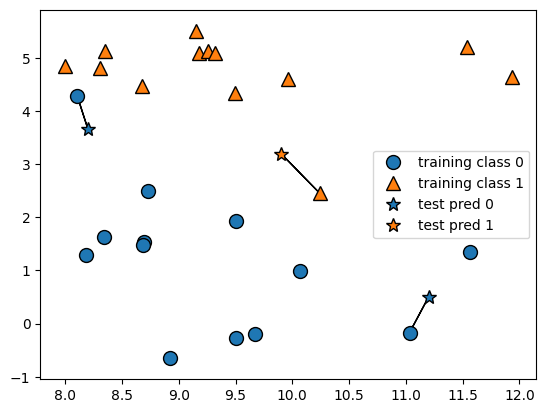

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

- Se han añadido `tres nuevos puntos de datos, mostrados como estrellas`. Para cada uno de ellos, marcamos el punto más cercano en el conjunto de entrenamiento. La predicción del algoritmo del `vecino más cercano es la etiqueta de ese punto (mostrada por el color de la cruz)`.

- En lugar de considerar sólo al vecino más cercano, también `podemos considerar un número arbitrario` $k$, de vecinos. De ahí viene el nombre del algoritmo $k$-vecinos más cercanos. Cuando se considera `más de un vecino, se utiliza la votación para asignar una etiqueta`. Esto significa que, para cada punto de prueba, contamos `cuántos vecinos pertenecen a clase 0 y cuántos vecinos pertenecen a la clase 1`. A continuación, `asignamos la clase que es más frecuente`: es decir, la clase mayoritaria entre los $k$ `vecinos más cercanos`.

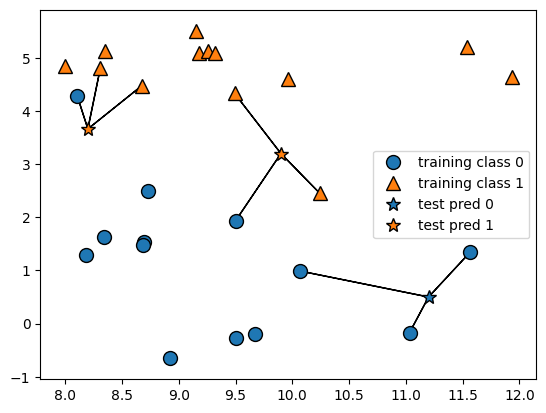

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

- Aunque esta ilustración se refiere a un `problema de clasificación binaria`, este método `puede aplicarse a conjuntos de datos con cualquier número de clases`. Para más clases, `contamos cuántos vecinos pertenecen a cada clase y volvemos a predecir la clase más común`. Ahora veamos cómo podemos aplicar el algoritmo de los `vecinos más cercanos` utilizando `scikit-learn`. 

- En primer lugar, dividimos nuestros datos en un conjunto de `entrenamiento` y otro de `prueba` para poder evaluar el rendimiento de la `generalización`. `random_state=0` nos asegura que obtendremos los `mismos conjuntos de training y test para diferentes ejecuciones`. Para mas información sobre `sklearn.model_selection.train_test_split` (ver documentación [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)). Por defecto, cuando no es suministrado el porcentaje de entrenamiento `train_test_split` considera este porcentaje para el test como el 25%, esto es `test_size=0.25`  

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

- A continuación, `importamos e instanciamos` la clase `KNeighborsClassifier` de `sklearn` encargada de la tarea de clasificación. Aquí es cuando podemos `establecer parámetros, como el número de vecinos a utilizar`, el cual consideramos como 3 para este ejemplo `n_neighbors=3`

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
clf = KNeighborsClassifier(n_neighbors=3)

- Ahora, `ajustamos el clasificador utilizando el conjunto de entrenamiento`. Para la clase `KNeighborsClassifier` esto significa `almacenar el conjunto de datos, para poder calcular los vecinos durante la predicción`, teniendo en cuenta la asignación de la clase más frecuente, explicada anteriormente

In [8]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

- Para hacer `predicciones sobre los datos de prueba`, llamamos al método de predicción `predict()`. Para cada punto de datos en el conjunto de prueba, éste `calcula sus vecinos más cercanos en el conjunto de entrenamiento y encuentra la clase más común entre ellos`. Para mas información sobre el cálculo del `score` (ver documentación [accuracy score](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score))

In [9]:
X_test

array([[11.54155807,  5.21116083],
       [10.06393839,  0.99078055],
       [ 9.49123469,  4.33224792],
       [ 8.18378052,  1.29564214],
       [ 8.30988863,  4.80623966],
       [10.24028948,  2.45544401],
       [ 8.34468785,  1.63824349]])

In [10]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [11]:
print("Test set: {}".format(y_test))

Test set: [1 0 1 0 1 1 0]


- Para evaluar `lo bien que generaliza` nuestro modelo, podemos llamar al método `score()` con los datos de prueba junto con las etiquetas de prueba `X_text, y_test`.

In [12]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


- Vemos que nuestro modelo tiene una `precisión` del 86%, lo que significa que `el modelo predijo la clase correctamente para el 86% de las muestras del conjunto de datos de prueba`.

## Análisis de `KNeighborsClassifier`

- Para los conjuntos de datos bidimensionales, también podemos ilustrar la `predicción para todos los posibles puntos de prueba en el plano` $xy$. Coloreamos el plano según la clase que se asignaría a un punto en esta región. Esto nos permite ver el `límite de decisión (decision boundary)` (ver [plot_2d_separator](https://github.com/amueller/mglearn/blob/master/mglearn/plot_2d_separator.py)), el cual está `entre el lugar donde el algoritmo asigna la clase 0 y el lugar donde asigna la clase 1`.

In [13]:
import matplotlib.pyplot as plt

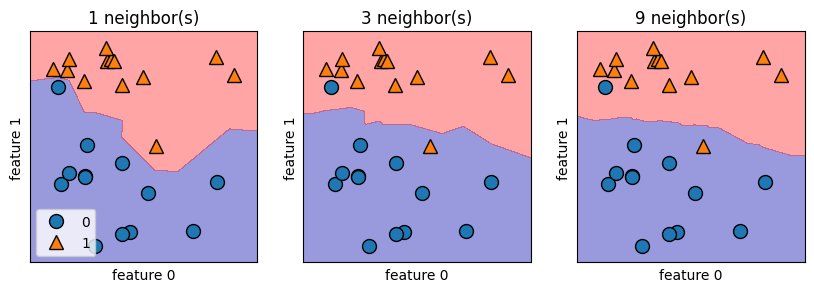

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    axes[0].legend(loc=3)

- Como se puede ver en la figura de la izquierda, `el uso de un solo vecino da como resultado una decisión que sigue de cerca los datos de entrenamiento`. La consideración de `más vecinos conduce a un límite de decisión más suave`. Un límite más suave corresponde a un `modelo más sencillo`. En otras palabras, `el uso de pocos vecinos corresponde a una alta complejidad del modelo` (como se muestra en el lado derecho), y `el uso de muchos vecinos corresponde a una baja complejidad del modelo`. 

- Si se considera el caso extremo en el que el `número de vecinos es el número de todos los puntos de datos del conjunto de entrenamiento`, cada punto de prueba tendría exactamente los mismos vecinos (todos puntos de entrenamiento) y todas las predicciones serían las mismas: `la clase más frecuente en el conjunto de entrenamiento`.

### Aplicación: Breast Cancer Dataset

```{figure} ./imgs/breast_cancer_knn.png
:name: breast_cancer_knn_fig
:align: center
:scale: 90
```

- **`Breast Cancer Dataset`**. Investiguemos si podemos confirmar la `conexión entre la complejidad del modelo y la generalización` que hemos discutido antes. Lo haremos con el conjunto de datos de cáncer de mama `(Breast Cancer)` del mundo real.
- **`Análisis Exploratorio de Datos`**. Procedemos a realizar un `análisis exploratorio de datos` para investigar y resumir principales características de nuestros datos. Primero cargamos nuestro dataset usando la función `load_breast_cancer()` de `sklearn.datasets`

In [15]:
from sklearn.datasets import load_breast_cancer

In [16]:
cancer = load_breast_cancer()

In [17]:
list(cancer.target_names)

['malignant', 'benign']

In [18]:
list(cancer.feature_names)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [19]:
cancer.data.shape

(569, 30)

In [20]:
cancer.target.shape

(569,)

In [21]:
import pandas as pd

In [22]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df.insert(0, 'diagnosis', cancer.target)

In [23]:
df.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- Aquí `0=malignant, 1=benign`. Verifiquemos que tipos de datos contiene el dataset. La función `info()` proporciona información sobre los `tipos de datos, columnas, recuento de valores nulos, uso de memoria`, etc.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

- El método `DataFrame.describe()` genera `estadísticos descriptivos` que resumen `tendencia central, dispersión` y la `forma de la distribución de un conjunto de datos`, excluyendo los valores `NaN`. Una cosa importante es que el método `describe() sólo trabaja con valores numéricos`. Por lo tanto, si hay algún valor categórico en una columna, el método describe() lo ignorará y mostrará el resumen de las demás columnas, a menos que se pase el `parámetro include="all"`.

In [25]:
df.describe()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


- Realicemos `tabla de frecuencias y diagrama de barras` para nuestra variable respuesta

In [26]:
df.diagnosis.value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [27]:
import seaborn as sns
sns.set_style("whitegrid")

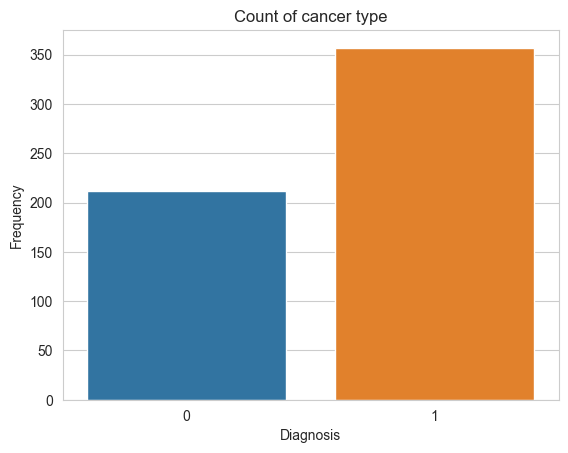

In [28]:
plt.title('Count of cancer type')
sns.countplot(x=df.diagnosis)
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.show()

- Nótese que nuestro dataset está `desbalanceado`. Existen técnicas como `SMOTE` y `Stratified sampling`, que pueden utilizarse para `mejorar el score de clasificación` de datos desbalanceados. Verifiquemos además si existen `datos faltantes` en nuestro `Dataframe`

In [29]:
df.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

- Pasamos a verficar si existe `correlación entre las características`

In [30]:
corr = df.iloc[: , 1:].corr()
corr.shape

(30, 30)

In [31]:
import numpy as np

In [32]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

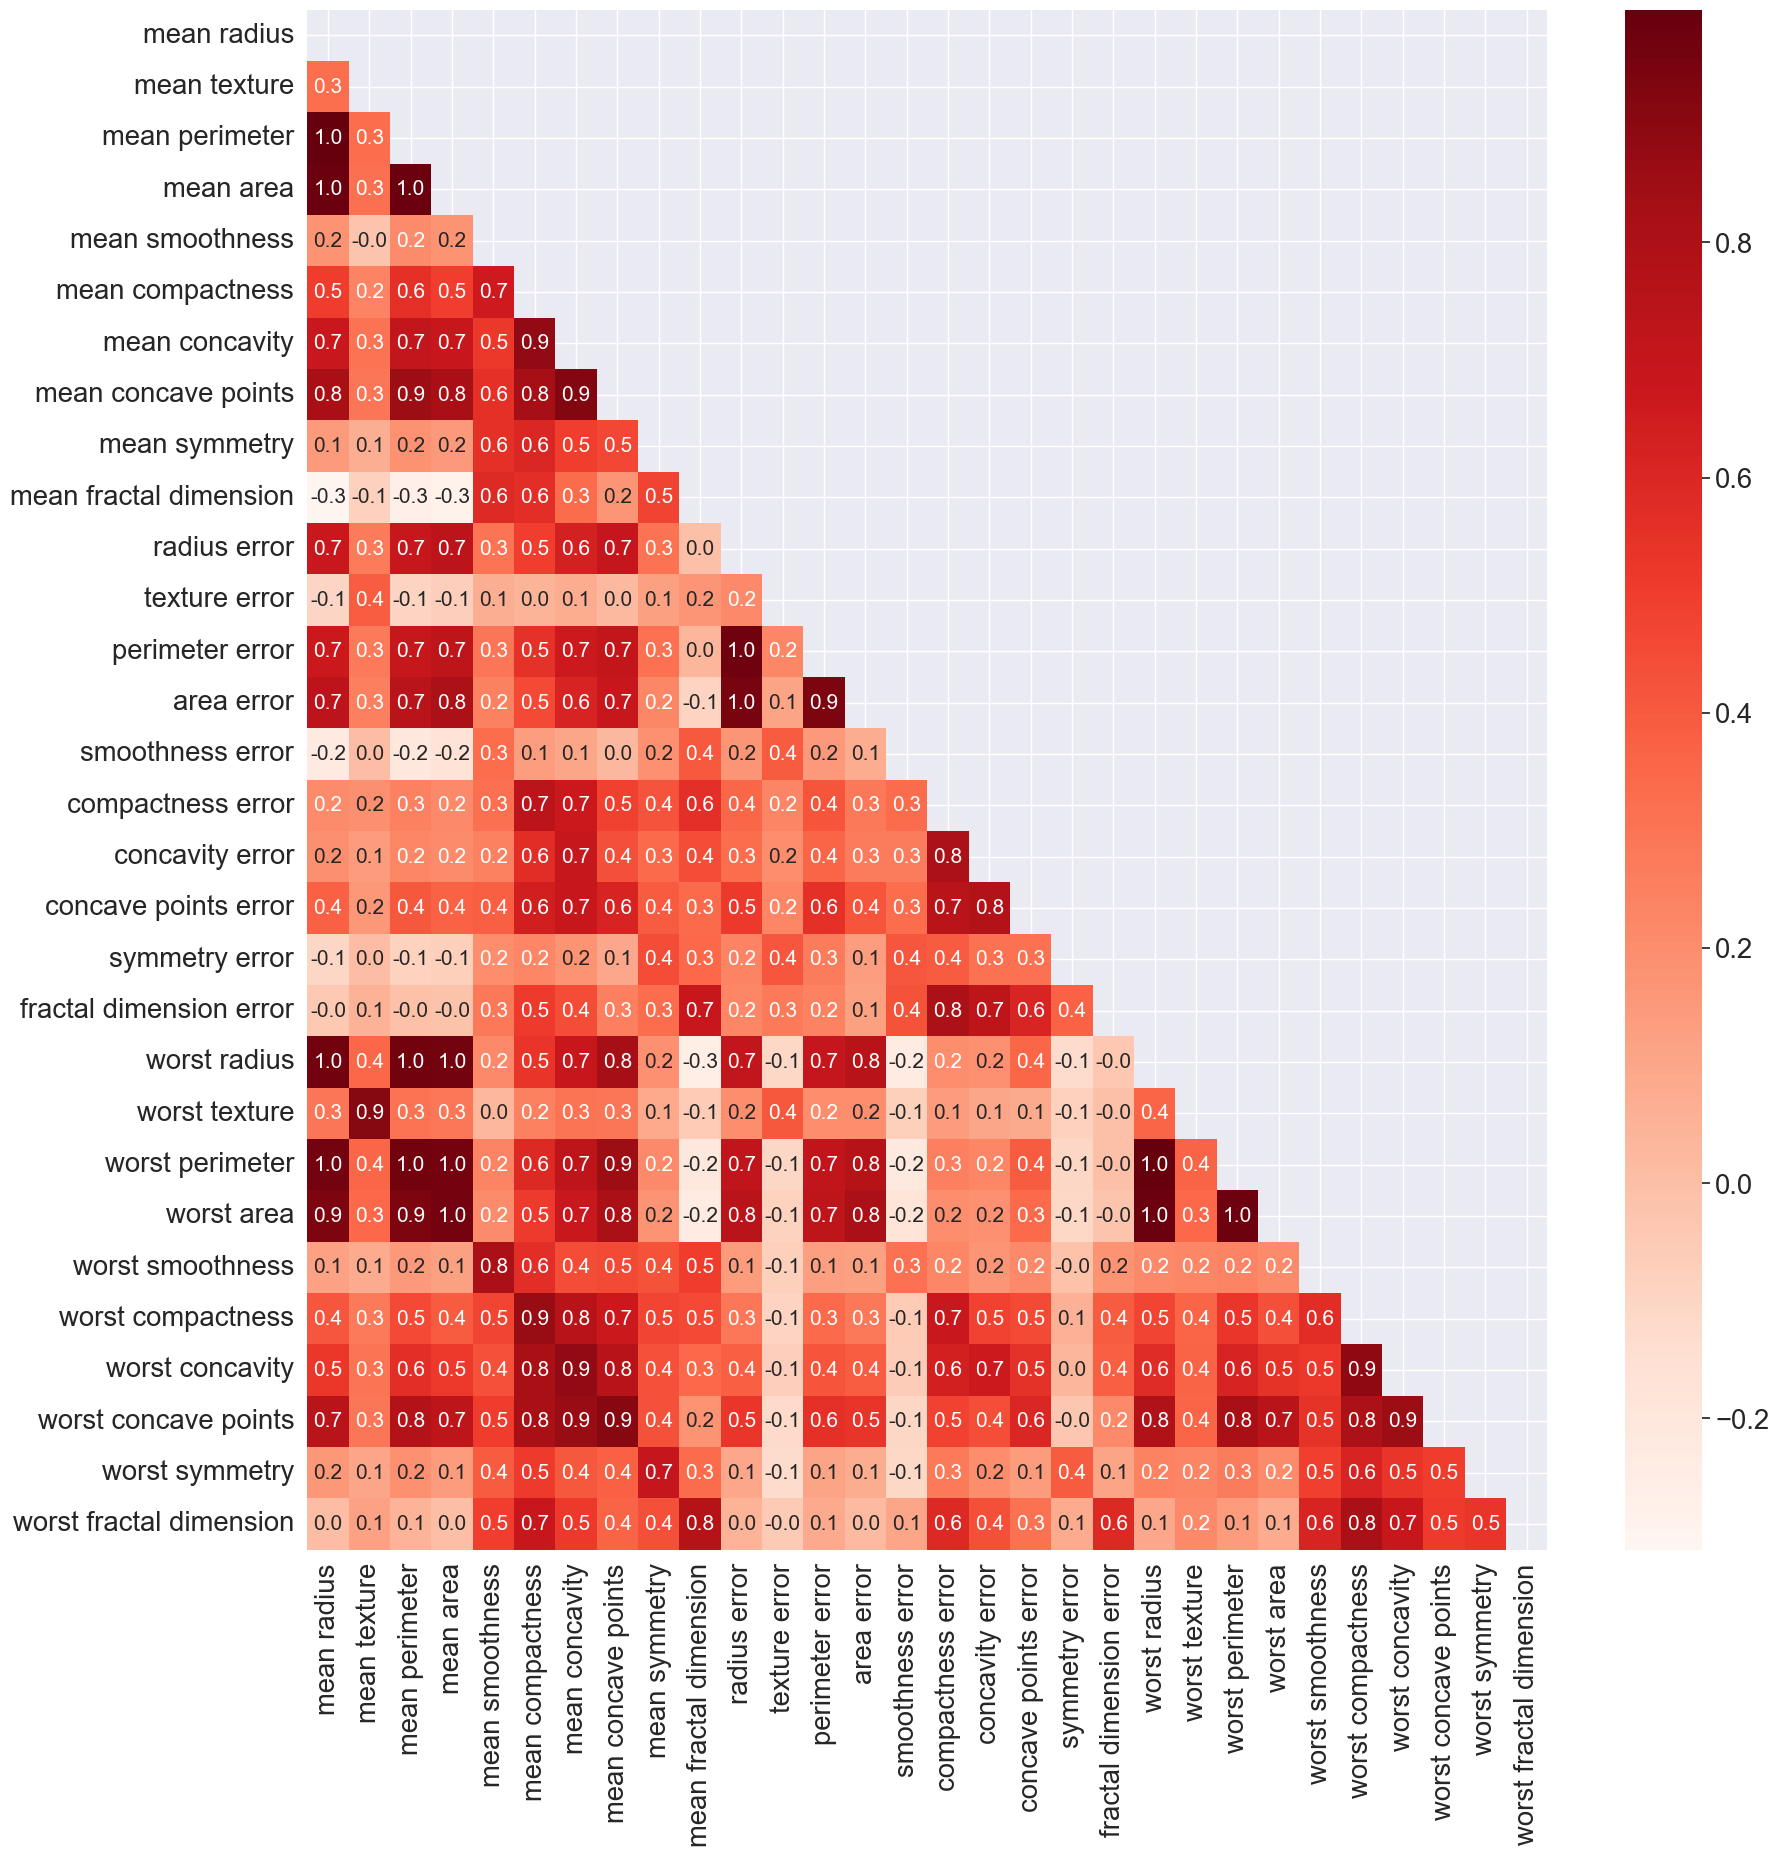

In [33]:
sns.set(font_scale=1.8)
plt.figure(figsize=(20,20))
sns.heatmap(corr, mask=mask, cbar=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Reds');

- Trazamos `histogramas de cada característica` en nuestro dataset

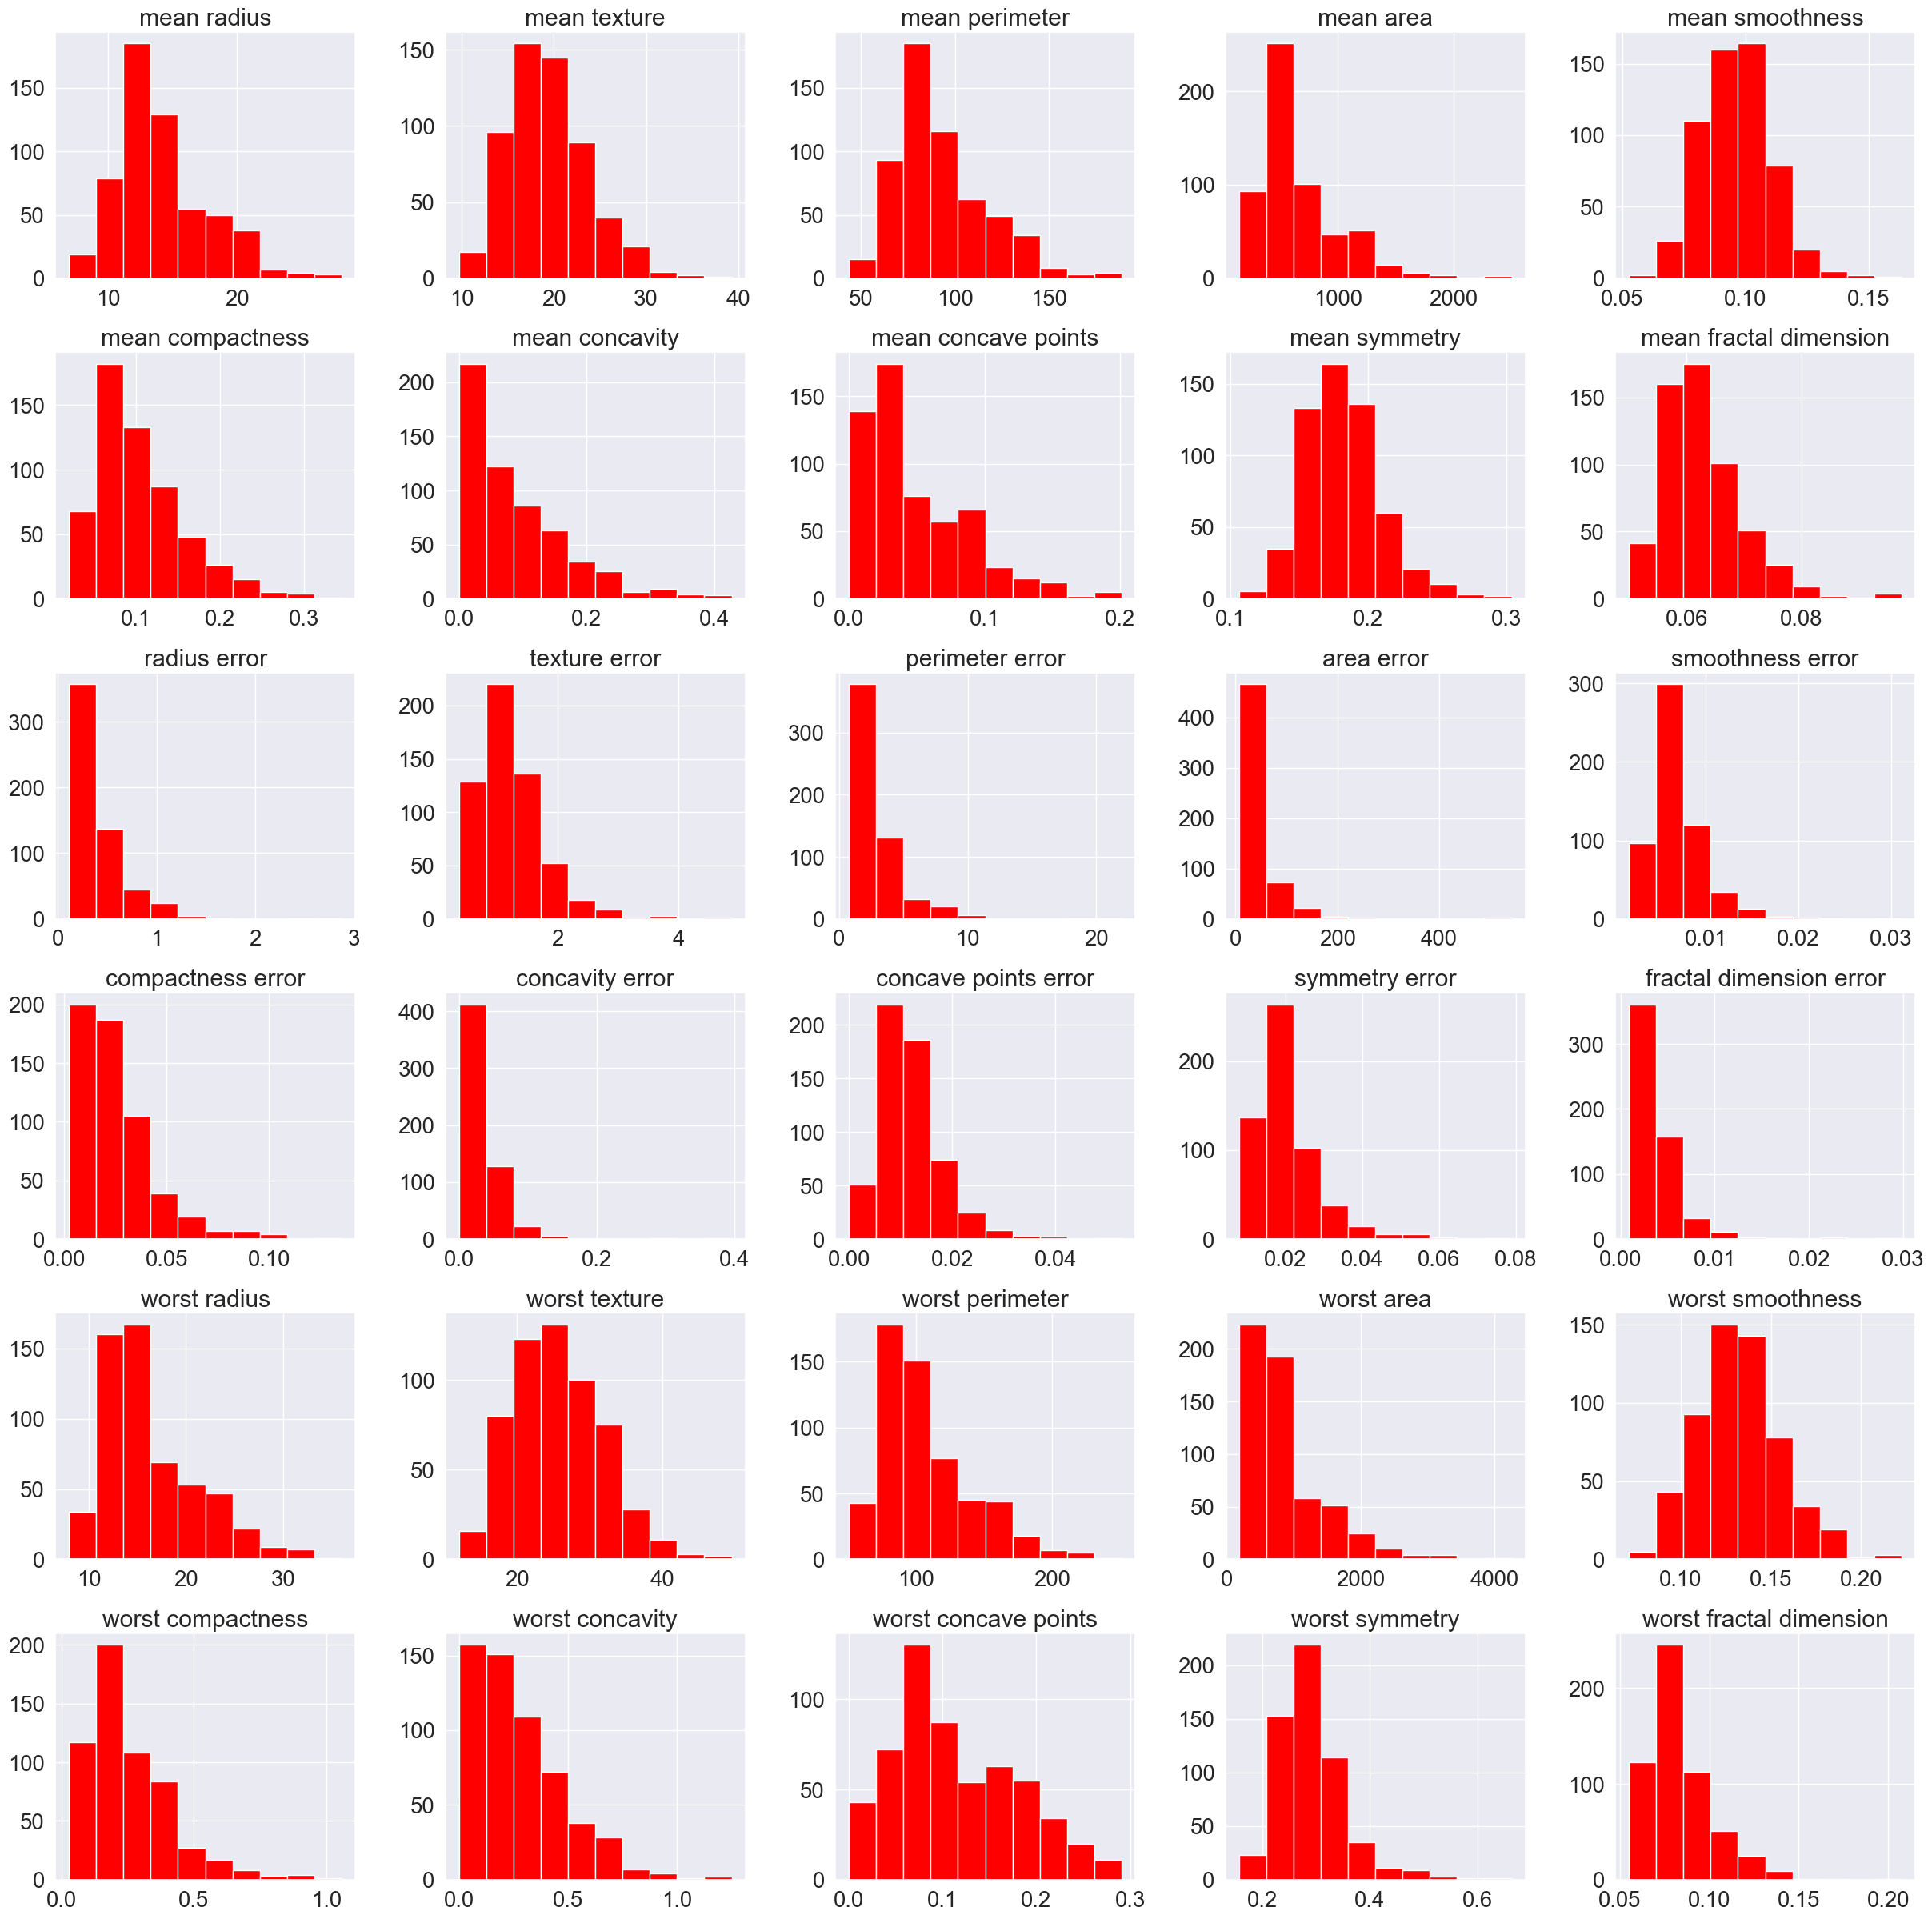

In [34]:
sns.set(font_scale=1.8)
df.iloc[: , 1:].hist(figsize = (30,30), color = 'red');

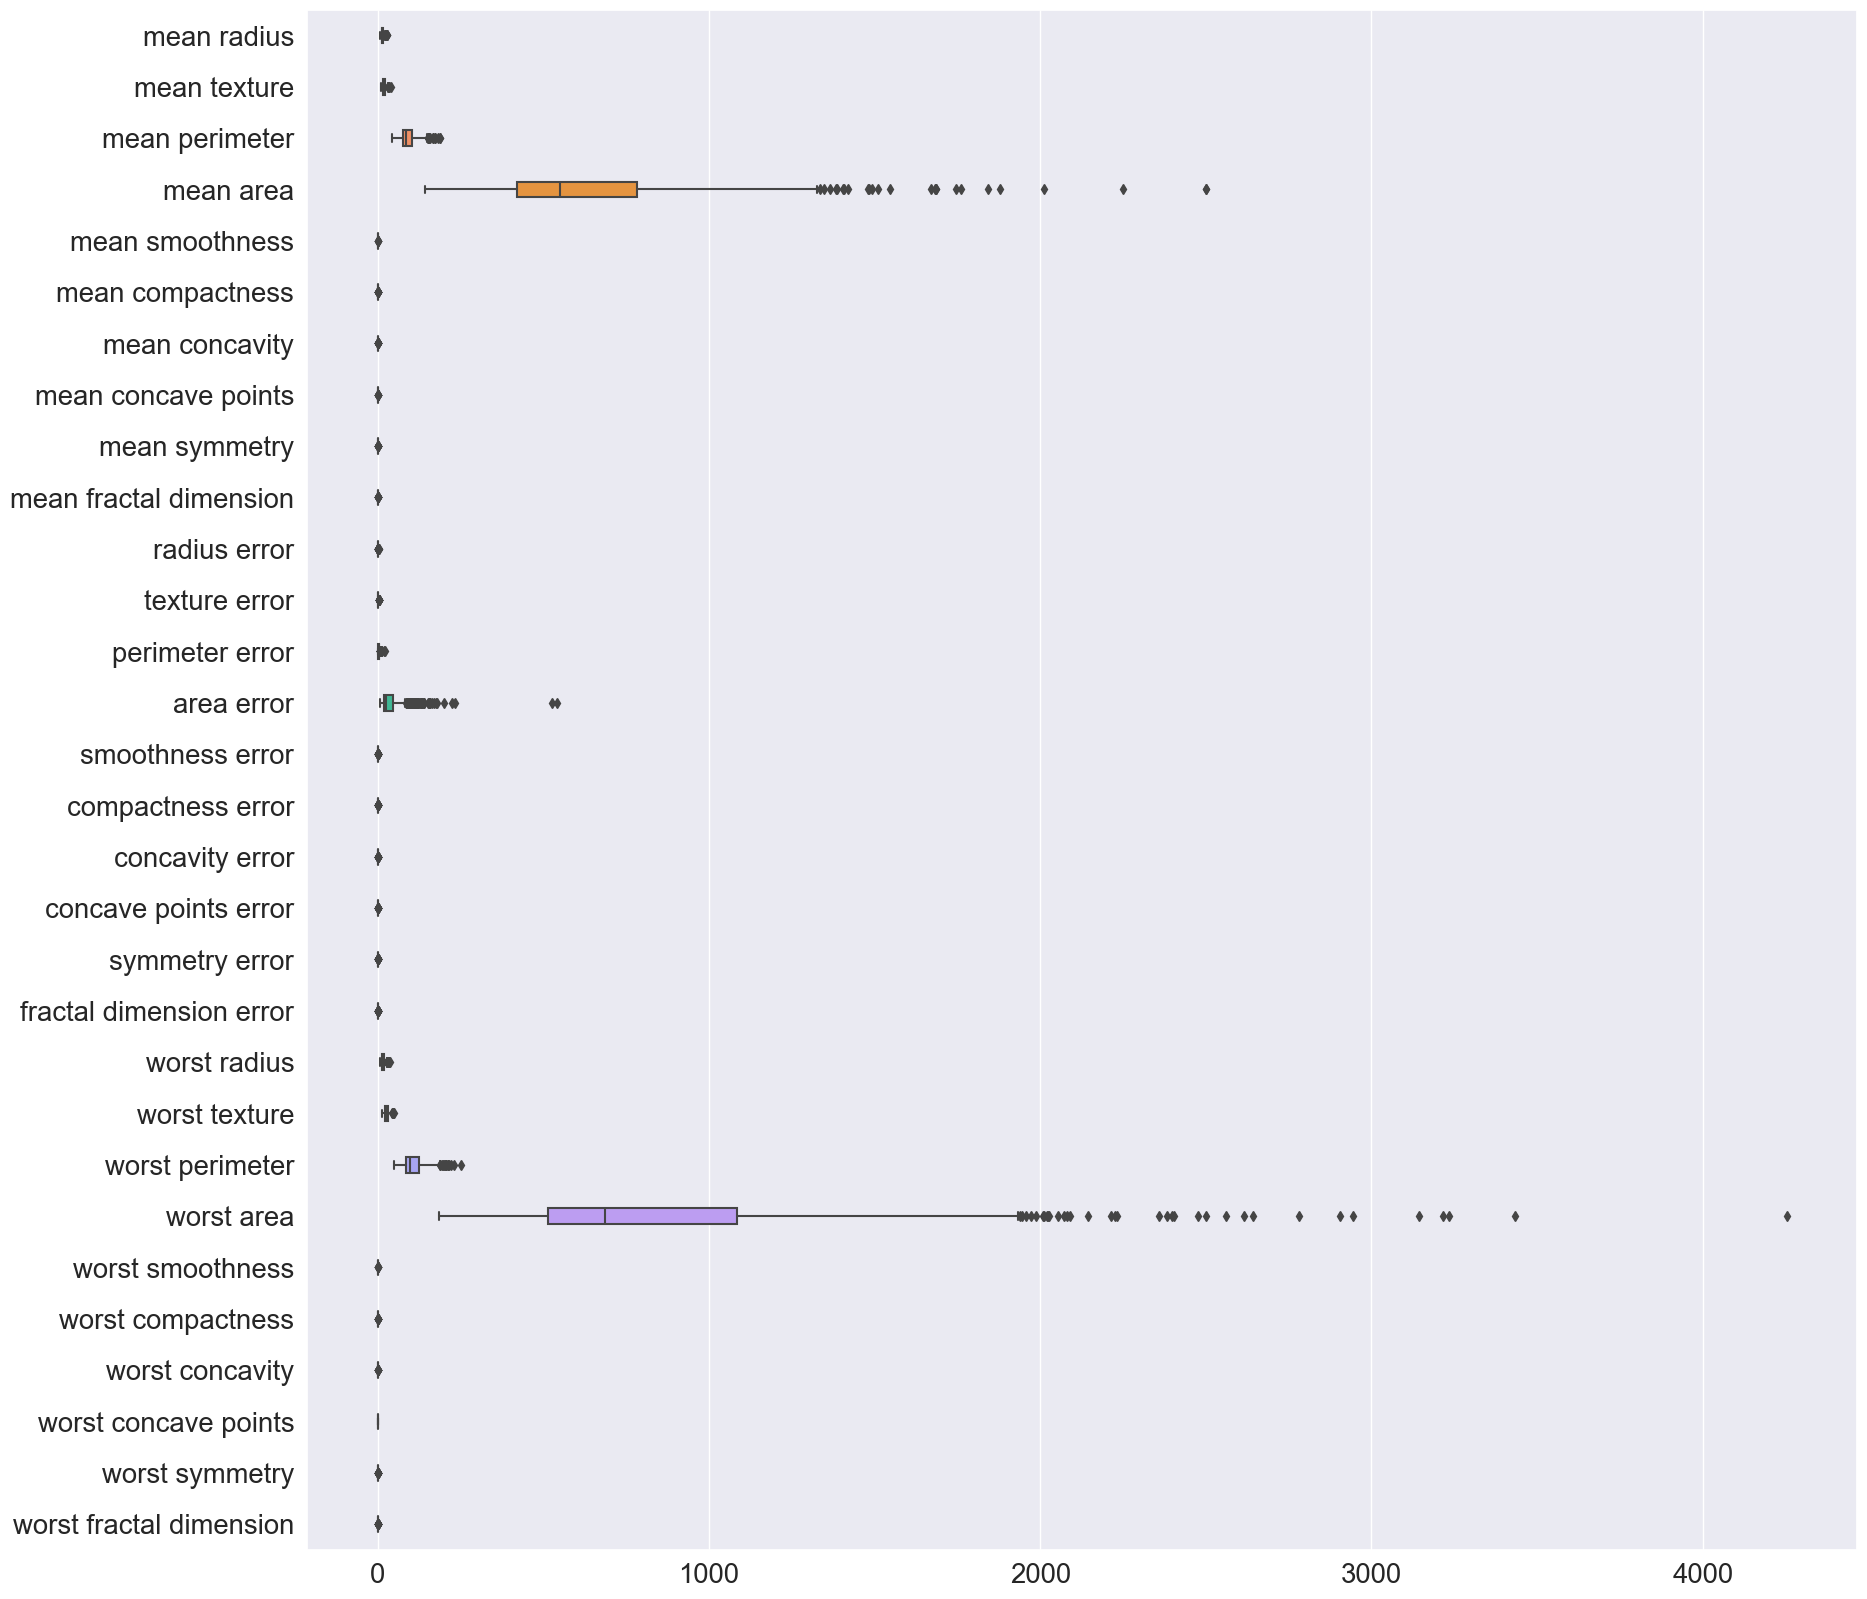

In [35]:
sns.set(font_scale=1.8)
plt.figure(figsize=(20,20))
sns.boxplot(data= df.drop(['diagnosis'], axis=1) ,width=0.3 , saturation=0.9,orient="h");

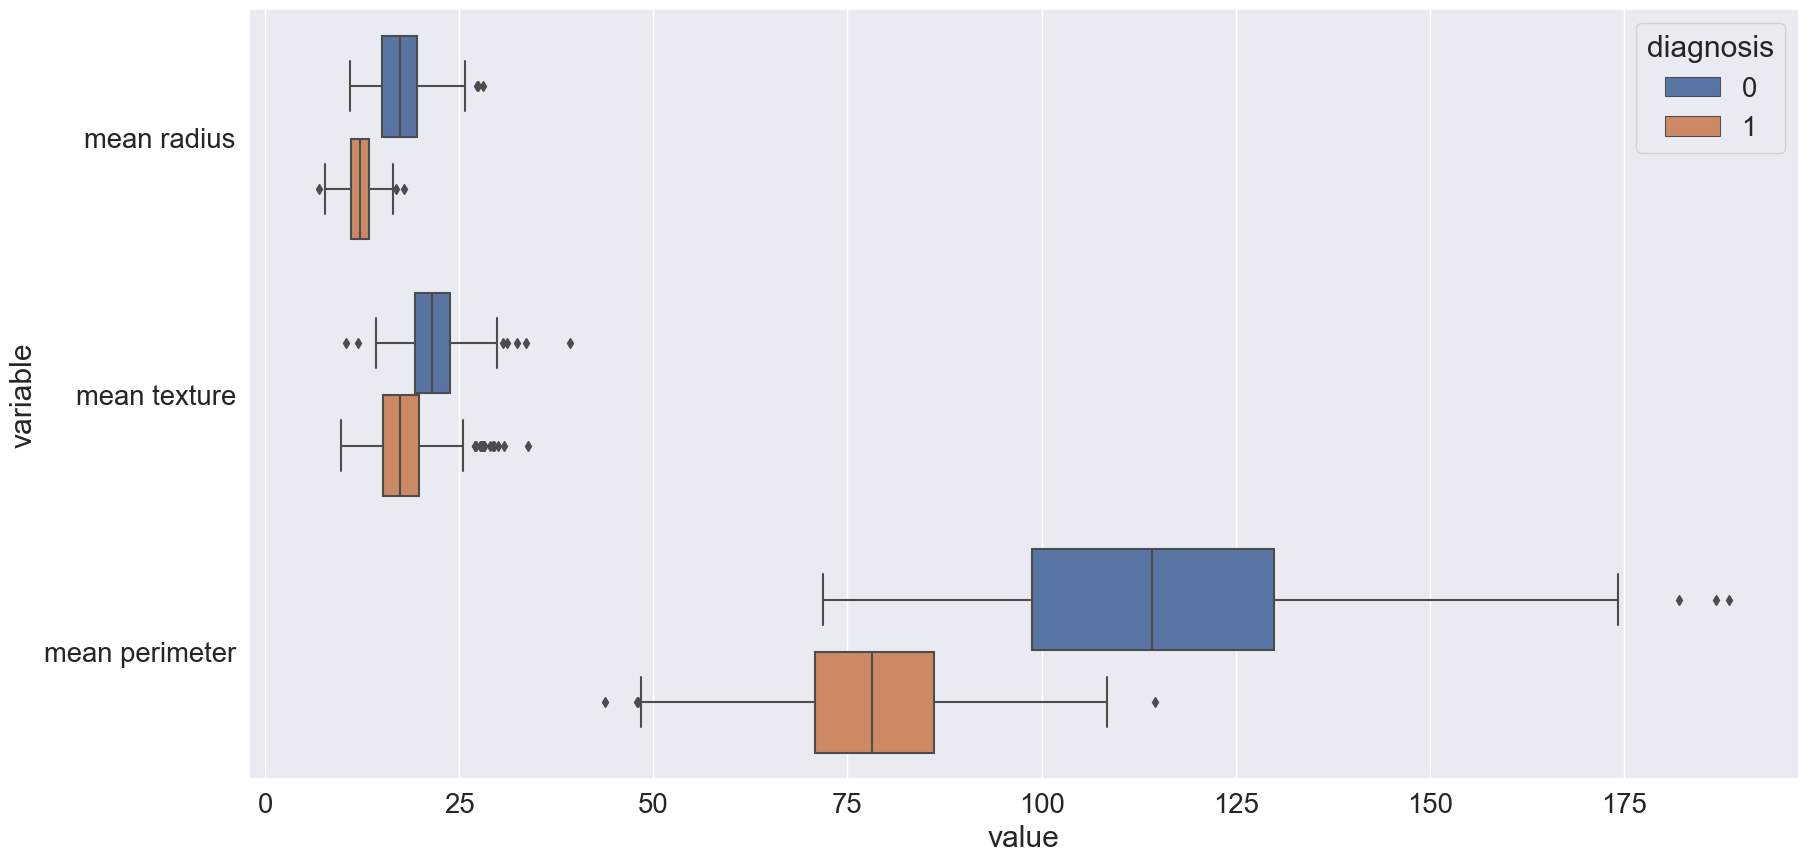

In [36]:
melted_data = pd.melt(df, id_vars = "diagnosis",value_vars = ['mean radius', 'mean texture', 
                                                              'mean perimeter'])
sns.set(font_scale=1.8)
plt.figure(figsize = (20,10))
sns.boxplot(x = "value", y = "variable", hue="diagnosis",data= melted_data);

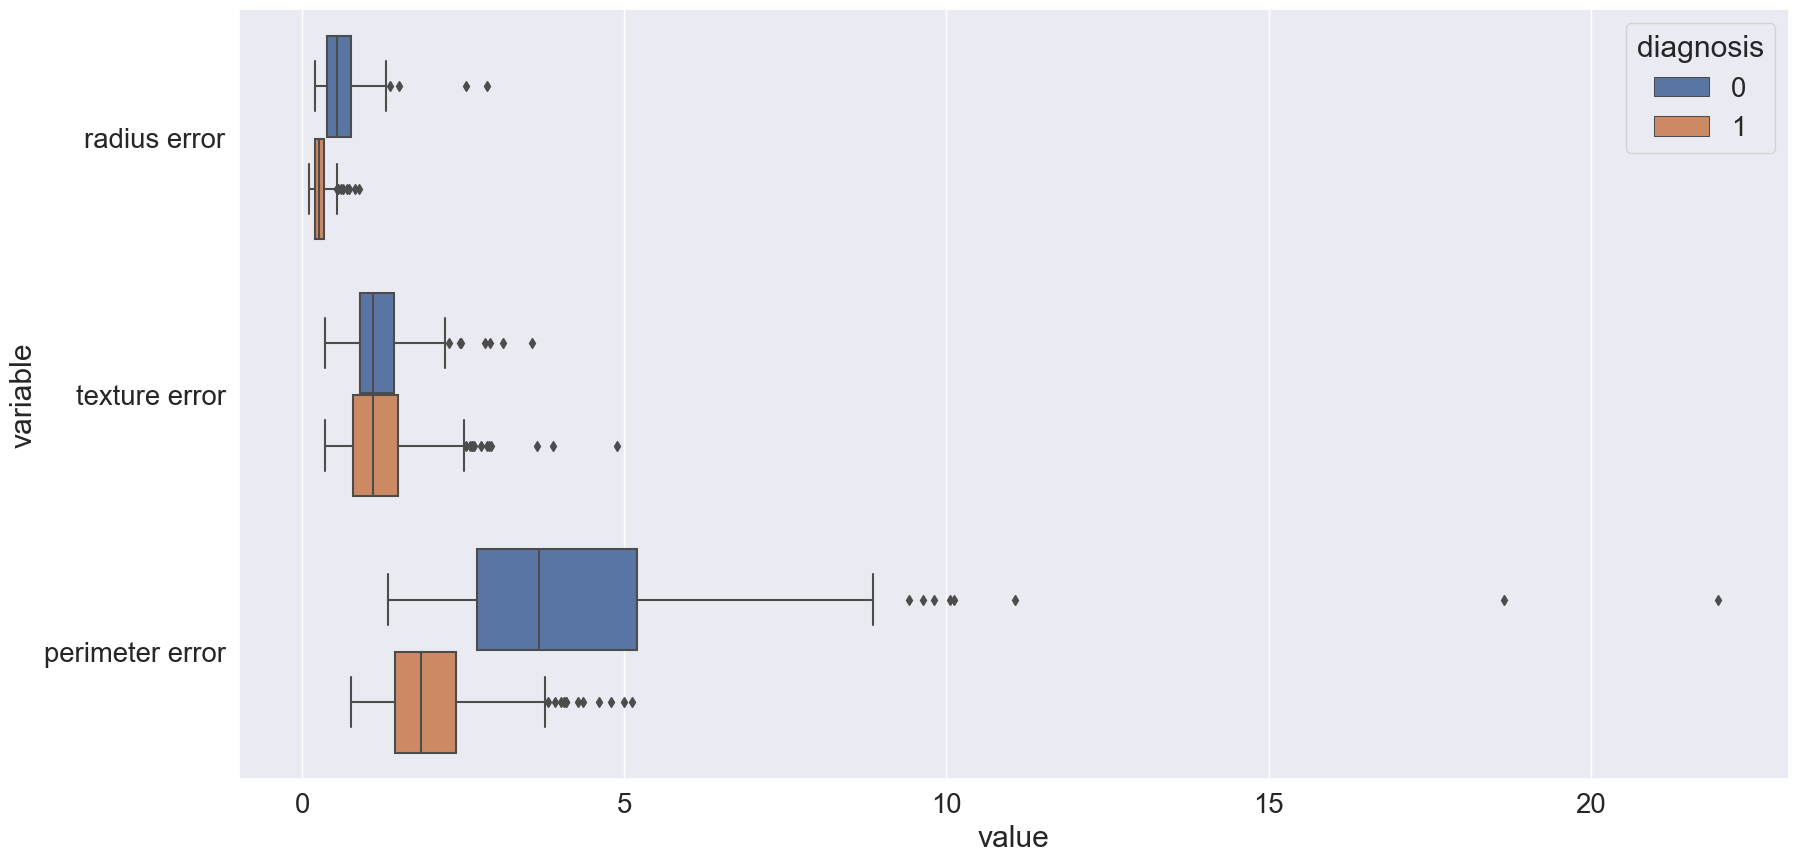

In [37]:
melted_data = pd.melt(df, id_vars = "diagnosis",value_vars = ['radius error', 
                                                              'texture error', 'perimeter error'])
sns.set(font_scale=1.8)
plt.figure(figsize = (20,10))
sns.boxplot(x = "value", y = "variable", hue="diagnosis",data= melted_data);

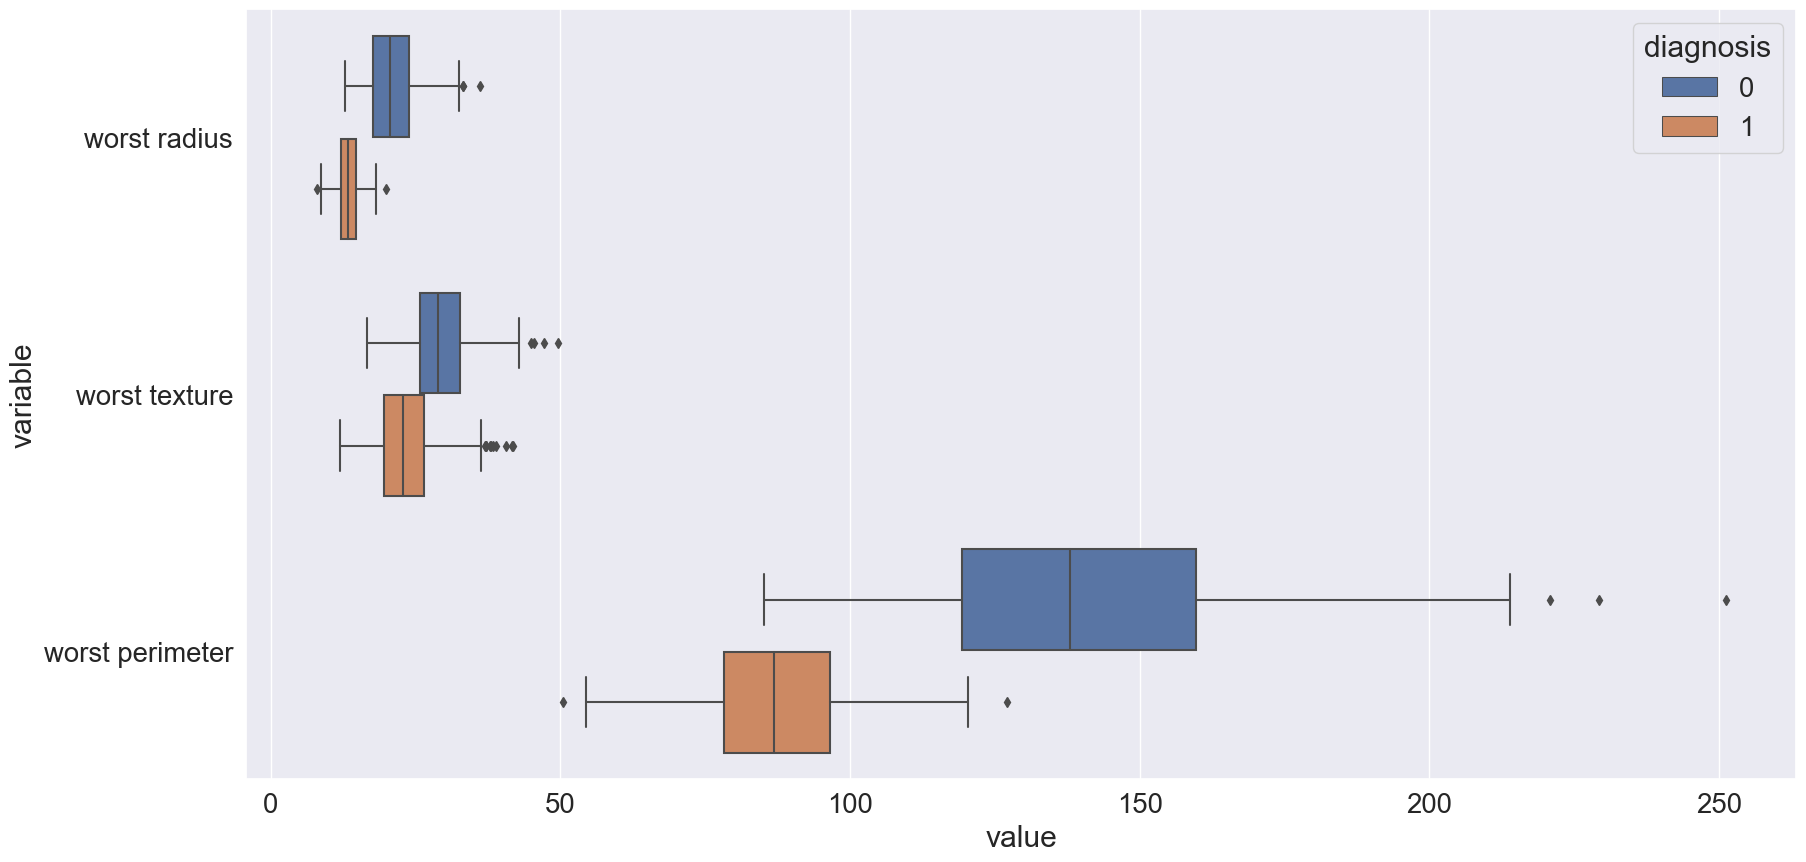

In [38]:
melted_data = pd.melt(df, id_vars = "diagnosis",value_vars = ['worst radius', 
                                                              'worst texture', 'worst perimeter'])
sns.set(font_scale=1.8)
plt.figure(figsize = (20,10))
sns.boxplot(x = "value", y = "variable", hue="diagnosis",data= melted_data);

In [39]:
columns = ['diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 
           'mean area', 'mean smoothness', 'mean compactness', 'mean concavity']

sns.set(font_scale=4.0)
sns.pairplot(data=df[columns], hue="diagnosis", palette='viridis', corner=True, height=7.0, aspect=1.0);

- Diagrama de `densidad de distribución KDE` y distribución mediante el diagrama de dispersión `stripplot()`

In [ ]:
matplotlib.rc_file_defaults()
sns.set_style("whitegrid")

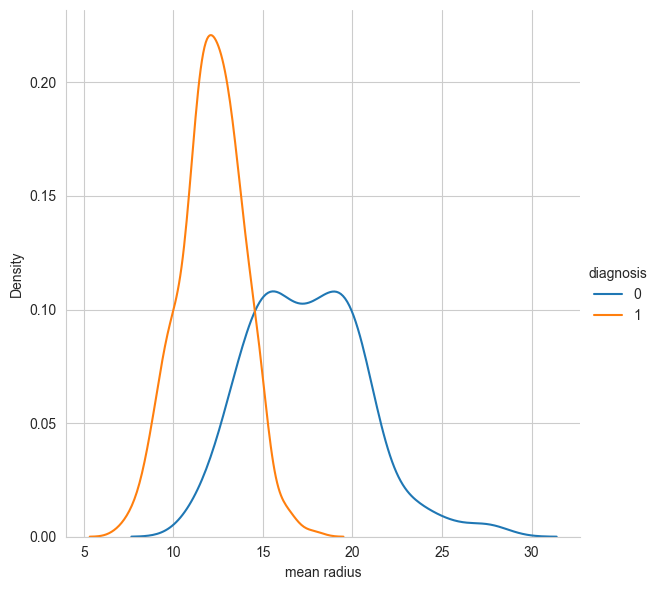

In [ ]:
sns.FacetGrid(df, hue="diagnosis", height=6).map(sns.kdeplot, "mean radius").add_legend();

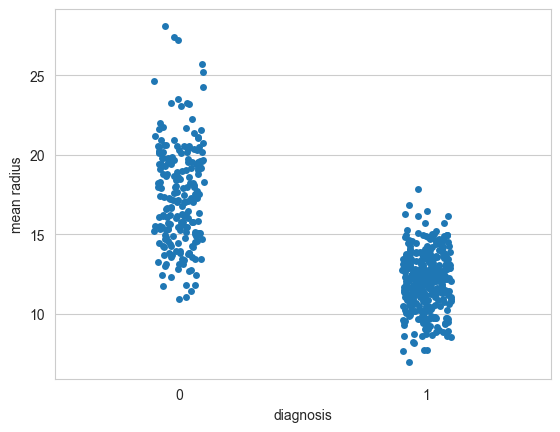

In [ ]:
sns.stripplot(x="diagnosis", y="mean radius", data=df, jitter=True, edgecolor="gray");

- La `multicolinealidad` es un problema ya que `reduce la importancia de las variables independientes`. A fin de solucionar este problem,  se `eliminan los predictores altamente correlacionados`. Podemos comprobar la presencia de multicolinealidad entre algunas de las variables. Por ejemplo, la columna `mean radius` tiene una `correlación de 1.0` con las columnas `mean perimeter` y `mean area`, respectivamente. Esto se debe a que `las tres columnas contienen esencialmente la misma información, que es el tamaño físico de la observación`. 

- Por lo tanto, `sólo debemos elegir una de las tres columnas cuando pasemos al análisis posterior`. Otro lugar donde la `multicolinealidad` es evidente, es entre las columnas `"mean"` y `"worst"`. Por ejemplo, la columna `mean radius` tiene una `correlación de 1.0` con la columna `worst radius`. También hay multicolinealidad entre los atributos `compactness, concavity` y `concave points`. Así que podemos elegir sólo uno de estos, por ejemplo `compactness`. De la matriz de correlación sabemos que estas columnas están altamente correlacionadas con las columnas `mean radius`, `perimeter`, `area`. Por lo tanto, estas columnas serán eliminadas. 

- Primero, eliminamos todas las columnas `worst`

In [ ]:
cols = ['worst radius', 
        'worst texture', 
        'worst perimeter', 
        'worst area', 
        'worst smoothness', 
        'worst compactness', 
        'worst concavity',
        'worst concave points', 
        'worst symmetry', 
        'worst fractal dimension']
df.drop(cols, inplace=True, axis=1);

- A continuación, `elimine todas las columnas relacionadas con` los atributos `perimeter` y `area`.

In [ ]:
cols = ['mean perimeter',
        'mean area',
        'perimeter error', 
        'area error']
df.drop(cols, inplace=True, axis=1);

- Por último, elimine todas las columnas relacionadas con los atributos `concavity` y `concave points`

In [ ]:
cols = ['mean concavity',
        'concavity error', 
        'mean concave points', 
        'concave points error']
df.drop(cols, inplace=True, axis=1);

- Verificar las columnas restantes

In [ ]:
df.columns

Index(['diagnosis', 'mean radius', 'mean texture', 'mean smoothness',
       'mean compactness', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'smoothness error',
       'compactness error', 'symmetry error', 'fractal dimension error'],
      dtype='object')

- Volvemos a dibujar el `mapa de calor` con la `nueva matriz de correlaciones`

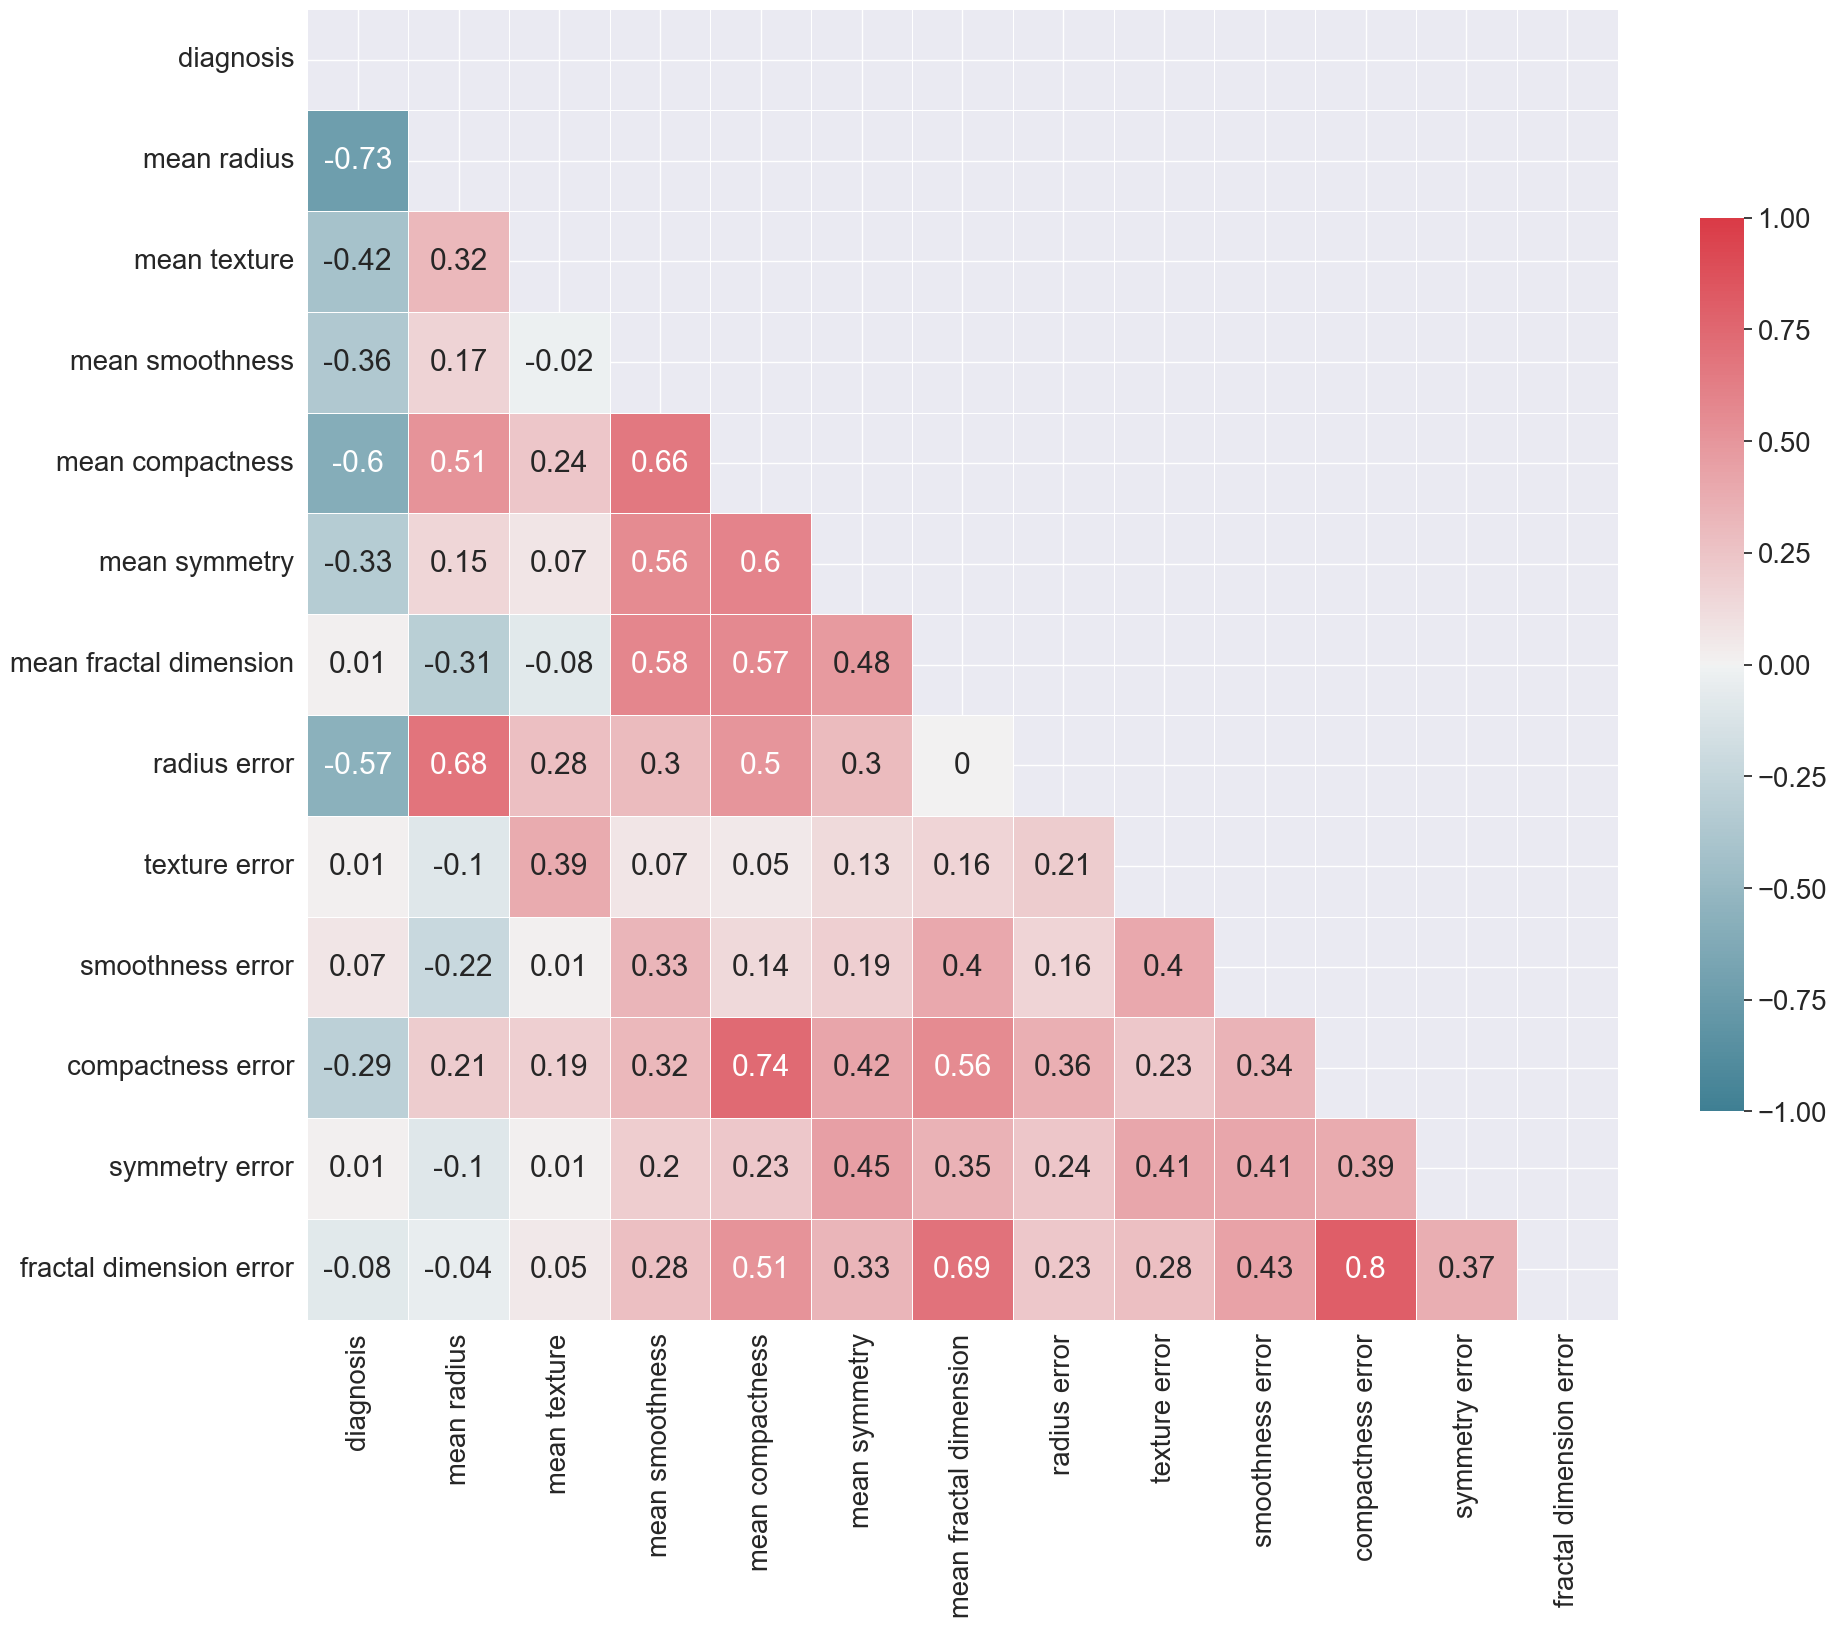

In [ ]:
corr = df.corr().round(2)

cmap = sns.diverging_palette(220, 10, as_cmap=True)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1.8)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5,
            cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

- `División en entrenamiento (train) y prueba (test)`. Dividimos la variable objetivo y las variables independientes. A continuación, evaluamos el `rendimiento del conjunto de entrenamiento y de prueba con diferentes números de vecinos`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 15)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

In [ ]:
matplotlib.rc_file_defaults()

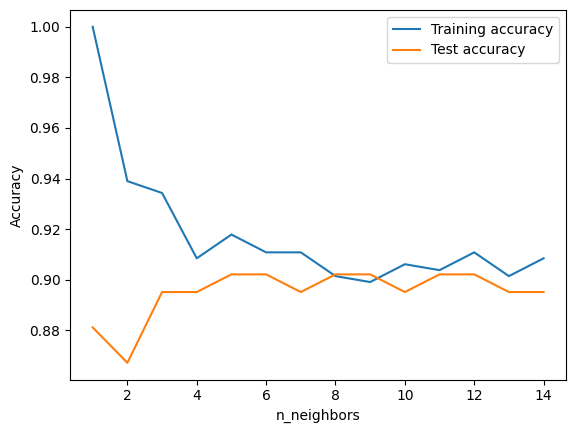

In [ ]:
plt.plot(neighbors_settings, training_accuracy, label="Training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();

- El gráfico muestra `accuracy para los conjuntos de entrenamiento y de prueba en el eje` $y$ contra el ajuste de `n_vecinos` en el eje $x$. Aunque los gráficos del mundo real no suelen ser muy suaves, podemos reconocer algunas de las características del sobreajuste `(overfitting)` y del subajuste `(underfitting)`. Si se considera `un solo vecino más cercano, la predicción en el conjunto de entrenamiento es perfecta`. Pero `cuando se consideran más vecinos, el modelo se simplifica y la precisión del entrenamiento disminuye`. 

- La `precisión del conjunto de prueba cuando se utiliza un solo vecino es menor que cuando se utilizan más vecinos`, lo que indica que `el uso de un solo vecino más cercano conduce a una mayor precisión en el conjunto de entrenamiento (modelo demasiado complejo)`. Pero cuando se consideran más vecinos, el modelo se simplifica y la precisión del entrenamiento disminuye. 

<!-- - Por otro lado, cuando se consideran 10 vecinos, el modelo es demasiado simple y el rendimiento es aún peor. `El mejor rendimiento se encuentra en un punto intermedio, utilizando alrededor de seis vecinos`. Aun así, es bueno tener en cuenta la escala de la figura. El peor rendimiento está en torno al 88% de precisión, lo que podría ser aceptable. -->

In [ ]:
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train), clf.score(X_test, y_test))

0.8990610328638498 0.9020979020979021


## Regresión por $k$-vecinos

- También existe una `variante de regresión del algoritmo` $k$`-vecinos más cercanos`. Una vez más, vamos a empezar utilizando el `vecino más cercano simple`, esta vez utilizando el conjunto de datos `wave`. Hemos añadido tres puntos de datos de prueba como estrellas verdes en el eje $x$. `La predicción utilizando un solo vecino es sólo el valor objetivo del vecino más cercano`

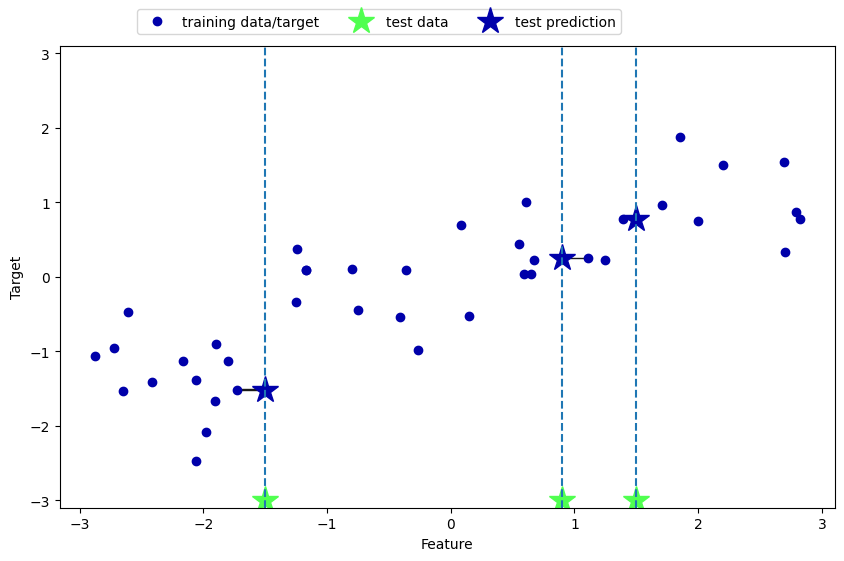

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

- De nuevo, podemos utilizar más que el único vecino más cercano para la regresión. `Cuando se utilizan varios vecinos más cercanos, la predicción es el promedio, o la media, de los vecinos`

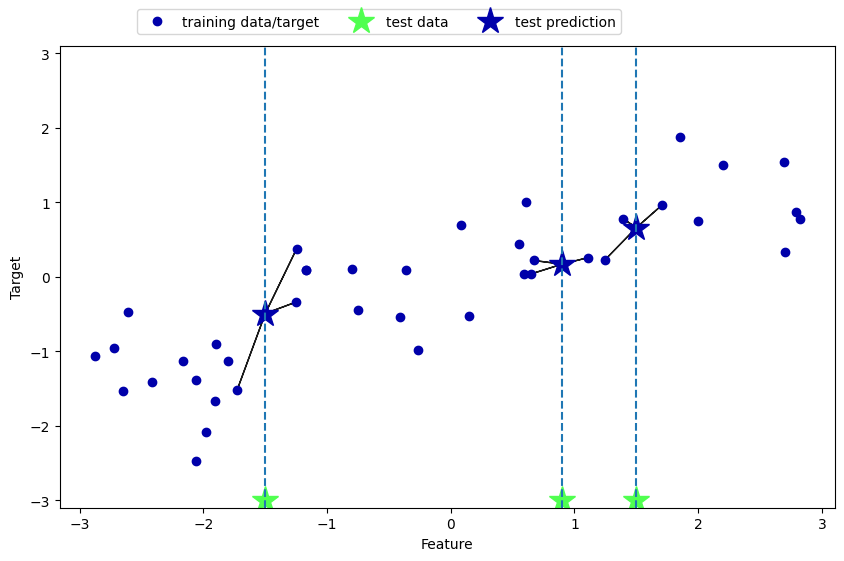

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

- El algoritmo de $k$-vecinos más cercanos para la `regresión` se implementa en la clase `KNeighbors Regressor` en `scikit-learn`. Se utiliza de forma similar a `KNeighborsClassifier`

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

- Ahora podemos hacer predicciones sobre el conjunto de prueba

In [ ]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


- También podemos `evaluar el modelo utilizando el método score`, que para los regresores devuelve la puntuación $R^2$. La puntuación $R^2$, también conocida como `coeficiente de determinación`, es una medida de predicción de un modelo de regresión, y arroja una puntuación entre 0 y 1. `Un valor de 1 corresponde a una predicción perfecta, y un valor de 0 corresponde a un modelo constante que sólo predice la media de las respuestas del conjunto de entrenamiento`, `y_train`. Aquí, el `score` es de 0.83, lo que indica un ajuste del modelo relativamente bueno.

In [ ]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


## Análisis de `KNeighborsRegressor`

- Para nuestro conjunto de datos unidimensional, podemos ver cómo son las predicciones para todos los valores posibles de las características. Para ello, creamos un conjunto de datos de prueba compuesto por muchos puntos de la línea

In [ ]:
import numpy as np

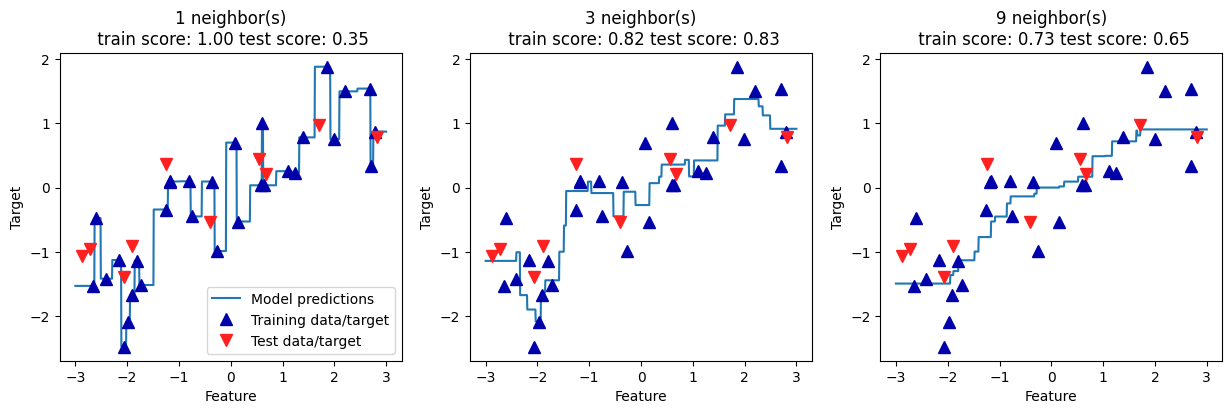

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, 
                                                                                  reg.score(X_train, y_train),
                                                                                  reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best");

- Como podemos ver en el gráfico, `al utilizar un solo vecino`, cada punto del conjunto de entrenamiento tiene una influencia obvia en las predicciones, y `los valores predichos pasan por todos los puntos de datos`. Esto conduce a una predicción muy inestable. `Tener en cuenta más vecinos conduce a predicciones más suaves`, pero éstas no se ajustan tan bien a los datos de entrenamiento.

### Aplicación: World Hydropower Generation

- **`World Hydropower Generation`**: Esta sección se centra en el uso del modelo $k$-NN y sus hiperparamétros, para garantizar una mejor comprensión de este algoritmo. `No se utilizan otros recursos como la ingeniería de características, la reducción de dimensionalidad`. El conjunto de datos utilizado es una recopilación de la `generación de energía de varios países europeos`, medida en `THh entre 2000 y 2019`. Su contenido fue extraído de `World in Data`.

- En primer lugar, se importan las librerías básicas: `pandas, matplotlib` y `numpy` para `Dataframes, Gráficos` y `operaciones numéricas`;`MinMaxScaler` para normalizar nuestros datos entre 0 y 1, `train_test_split` para ayudar a dividir el conjunto de datos (normalmente 70% entrenamiento/ 30% prueba) y `neighbors` para generar nuestros modelos usando kNN

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

- Para medir la eficacia de nuestros modelos generados, utilizamoslas siguientes métricas:
    - `mean_absolute_error (MAE)`: medida de los errores entre observaciones emparejadas que expresan el mismo fenómeno;
    - `mean_squared_error (root - RMSE)`: la desviación estándar de los residuos (errores de predicción);
    - `mean_squared_log_error (root - RMSLE)`: mide la relación entre lo real y lo predicho;
    - `r2_score (R2):`: coeficiente de determinación, la proporción de la varianza en la variable dependiente que es predecible a partir de la(s) variable(s) independiente(s); y
    - `explained_variance_score (EVS)`: mide la discrepancia entre un modelo y los datos reales.

- **`Preprocesamiento de datos`**: Inicialmente, los datos son importados, y se excluyen las columnas categóricas (en este caso, sólo `"Country"`). Para transformar el conjunto de datos y mantenerlo como un `Dataframe`, se utiliza la librería `scaler` dentro de la librería `Dataframe, normalizando los datos entre 0 y 1, y manteniendo las propiedades del dataframe`. Después de esto, se llama a la función `describe`, para mostrar algunos datos importantes sobre el `dataframe`, como `mean, max, min, std` y otros.


In [ ]:
pd.options.display.float_format = '{:.4f}'.format

scaler = MinMaxScaler(feature_range=(0, 1))

df_power = pd.read_csv('https://raw.githubusercontent.com/lihkir/Data/main/Hydropower_Consumption.csv', sep=',')

In [ ]:
df_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  153 non-null    object
 1   2000     153 non-null    int64 
 2   2001     153 non-null    int64 
 3   2002     153 non-null    int64 
 4   2003     153 non-null    int64 
 5   2004     153 non-null    int64 
 6   2005     153 non-null    int64 
 7   2006     153 non-null    int64 
 8   2007     153 non-null    int64 
 9   2008     153 non-null    int64 
 10  2009     153 non-null    int64 
 11  2010     153 non-null    int64 
 12  2011     153 non-null    int64 
 13  2012     153 non-null    int64 
 14  2013     153 non-null    int64 
 15  2014     153 non-null    int64 
 16  2015     153 non-null    int64 
 17  2016     153 non-null    int64 
 18  2017     153 non-null    int64 
 19  2018     153 non-null    int64 
 20  2019     153 non-null    int64 
dtypes: int64(20), object(1)
memory usage: 2

In [ ]:
df_power.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,312,498,555,63,565,59,637,748,542,...,751,595,71,804,895,989,1025,105,105,107
1,Africa,75246,80864,85181,82873,87405,89066,92241,95341,97157,...,107427,110445,110952,117673,123727,115801,123816,130388,132735,0
2,Albania,4548,3519,3477,5117,5411,5319,4951,276,3759,...,7673,4036,4725,6959,4726,5866,7136,448,448,4018
3,Algeria,54,69,57,265,251,555,218,226,283,...,173,378,389,99,193,145,72,56,117,152
4,Angola,903,1007,1132,1229,1733,2197,2638,2472,3103,...,3666,3967,3734,4719,4991,5037,5757,7576,7576,8422


In [ ]:
countries = df_power.Country

In [ ]:
df_power = df_power.drop(columns = ["Country"])
df_power = pd.DataFrame(scaler.fit_transform(df_power), 
                        columns=['2000','2001','2002','2003','2004','2005',
                                 '2006','2007','2008','2009','2010','2011',
                                 '2012','2013','2014','2015','2016','2017',
                                 '2018','2019'])

In [ ]:
df_power.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000,153.0000
mean,0.0327,0.0353,0.0355,0.0328,0.0419,0.0390,0.0415,0.0434,0.0371,0.0445,0.0328,0.0433,0.0352,0.0290,0.0282,0.0265,0.0306,0.0296,0.0388,0.0259
std,0.1229,0.1262,0.1278,0.1249,0.1372,0.1364,0.1366,0.1440,0.1293,0.1493,0.1208,0.1459,0.1294,0.1121,0.1062,0.1031,0.1117,0.1110,0.1317,0.1043
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0002,0.0003,0.0003,0.0003,0.0003,0.0004,0.0003,0.0004,0.0004,0.0003,0.0004,0.0002,0.0004,0.0002,0.0003,0.0002,0.0002,0.0002,0.0003,0.0002
50%,0.0027,0.0030,0.0026,0.0027,0.0037,0.0028,0.0031,0.0039,0.0032,0.0035,0.0043,0.0040,0.0034,0.0025,0.0024,0.0019,0.0025,0.0020,0.0029,0.0019
75%,0.0116,0.0128,0.0119,0.0118,0.0155,0.0107,0.0149,0.0151,0.0147,0.0152,0.0145,0.0156,0.0140,0.0096,0.0121,0.0086,0.0117,0.0113,0.0171,0.0097
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


- Ahora, el objetivo es crear un `modelo que prediga la generación de energía para 2019, basándose en los 18 años anteriores (2000 - 2018)` con `al menos un 75% de precisión`. Para ello, el conjunto de datos se separó en `X` e `y`, siendo `X` datos de predicción e `y` lo que se pretende predecir. Para ello, se dividen en `entrenamiento (70%)` y `prueba (30%)`.

In [ ]:
X = df_power.drop(columns = ["2019"])
y = df_power["2019"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

- Como ya tenemos seleccionados los datos de entrenamiento y de prueba, es necesario `encontrar el factor` $k$ que genere los `mejores resultados para el algoritmo`. Una de las formas de encontrar este factor $k$ es `realizar una prueba con varios valores y medir los resultados porcentuales`. Será necesario agotar un gran número de posibilidades de $k$

In [ ]:
rmsle_val = []
best_rmsle = 1.0

for k in range(20):
    k = k+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = k)

    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    rmsle = np.sqrt(mean_squared_log_error(y_test,y_pred))
    if (rmsle < best_rmsle):
        best_rmsle = rmsle
        best_k = k
    rmsle_val.append(rmsle)
    print('RMSLE value for k= ' , k , 'is:', rmsle)

print(f"Best RMSLE: {best_rmsle}, Best k: {best_k}")

RMSLE value for k=  1 is: 0.05771085849033799
RMSLE value for k=  2 is: 0.046287824938614094
RMSLE value for k=  3 is: 0.05245290672301628
RMSLE value for k=  4 is: 0.03904370874530979
RMSLE value for k=  5 is: 0.04413545109970342
RMSLE value for k=  6 is: 0.049397885066996064
RMSLE value for k=  7 is: 0.05368842644105438
RMSLE value for k=  8 is: 0.057205532019402504
RMSLE value for k=  9 is: 0.05970971610365409
RMSLE value for k=  10 is: 0.06264220706736034
RMSLE value for k=  11 is: 0.06519555508343818
RMSLE value for k=  12 is: 0.06683376633168203
RMSLE value for k=  13 is: 0.06835697276199447
RMSLE value for k=  14 is: 0.0700987590270357
RMSLE value for k=  15 is: 0.0714815908074978
RMSLE value for k=  16 is: 0.07276108145829546
RMSLE value for k=  17 is: 0.07381745094856672
RMSLE value for k=  18 is: 0.07488933459172763
RMSLE value for k=  19 is: 0.07579673979403485
RMSLE value for k=  20 is: 0.07667076282857414
Best RMSLE: 0.03904370874530979, Best k: 4


- Nuestra métrica indica que `el menor error se produce cuando tenemos` $k = 4$ `(RMSLE de 0.0390)`, lo que indica un error relativo entre los valores predichos y los actuales del 3,90%. Por lo tanto, `presentaremos todos los valores en un gráfico, que nos mostrará visualmente los resultados obtenidos`. Esta función se conoce como `"función codo"`, dada la variación porcentual que se produce entre los valores de $k$, primero hacia abajo y luego hacia arriba, cuando $k$ encuentra su mejor valor. Estamos trazando los valores `RMSLE` frente a los valores de $k$.

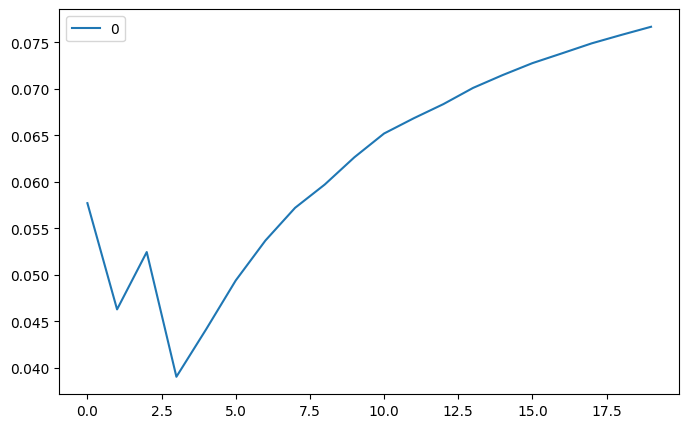

In [ ]:
curve = pd.DataFrame(rmsle_val)
curve.plot(figsize=(8,5));

- El gráfico muestra una `caída brusca del RMSLE` a medida que $k$ avanza hasta 4, momento en el que empieza a aumentar indefinidamente, lo que nos lleva a la conclusión de que `4 es el mejor resultado para` $k$. Una vez encontrado el mejor valor para $k$, es hora de entrenar el modelo y predecir los resultados. También haremos uso de la función de `score`, que nos permitirá ver la `tasa de precisión de nuestro modelo (80,16%)`.

In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 4)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.8016285342188538

- Una vez se ha construido el modelo y se prueban algunas predicciones, podemos aplicar las `métricas` y `analizar los resultados`. Aquí se `comparan el conjunto de prueba con las predicciones` usando las métricas `R2, EVS, MAE, RMSE, RMSLE`, para verificar cuáles son los resultados de cada una de ellas.

In [ ]:
r2_valid = r2_score(y_test, y_pred)
mae_valid = mean_absolute_error(y_test, y_pred)
evs_valid = explained_variance_score(y_test, y_pred, multioutput='uniform_average')
rmse_valid = np.sqrt(mean_squared_error(y_test, y_pred))
rmsle_valid = np.sqrt(mean_squared_log_error(y_test, y_pred))

print('R2 Valid:',r2_valid)
print('EVS Valid:', evs_valid)
print('MAE Valid:', mae_valid)
print('RMSE Valid:',rmse_valid)
print('RMSLE Valid:', rmsle_valid)

R2 Valid: 0.8016285342188538
EVS Valid: 0.8131526313306373
MAE Valid: 0.017960057840249434
RMSE Valid: 0.04999229884993785
RMSLE Valid: 0.03904370874530979


- Los resultados muestran un `R2 del 80,16%` y un `EVS del 81,31%`, lo que indica que nuestro modelo tiene un `gran ajuste a su muestra (R2)` y una `fuerte asociación entre el modelo y sus datos actuales (EVS)`. En cuanto al `RMSLE`, sólo tiene en cuenta el `error relativo entre el valor previsto y el real, y la escala del error no es significativa`. Por otro lado, el valor `RMSE aumenta en magnitud si aumenta la escala del error`.

- Una vez realizada la predicción y comprobado el modelo, `organizamos los resultados uno al lado del otro para poder hacer una comparación`.

In [ ]:
country_test = countries[len(countries)-len(y_test):]

In [ ]:
data_prediction = list(zip(y_test,y_pred))
data_prediction = pd.DataFrame(data_prediction, columns=['Test','Prediction'])
data_prediction = data_prediction.set_index(country_test)
data_prediction.head(10)

,Test,Prediction
Country,,
Papua New Guinea,0.0406,0.0268
Paraguay,0.0044,0.0039
Peru,0.0134,0.0096
Phillipines,0.0280,0.0128
Poland,0.0164,0.0125
Portugal,0.0321,0.0155
Puerto Rico,0.4982,0.3417
Reunion,0.5331,0.3417
Romania,0.0007,0.0075


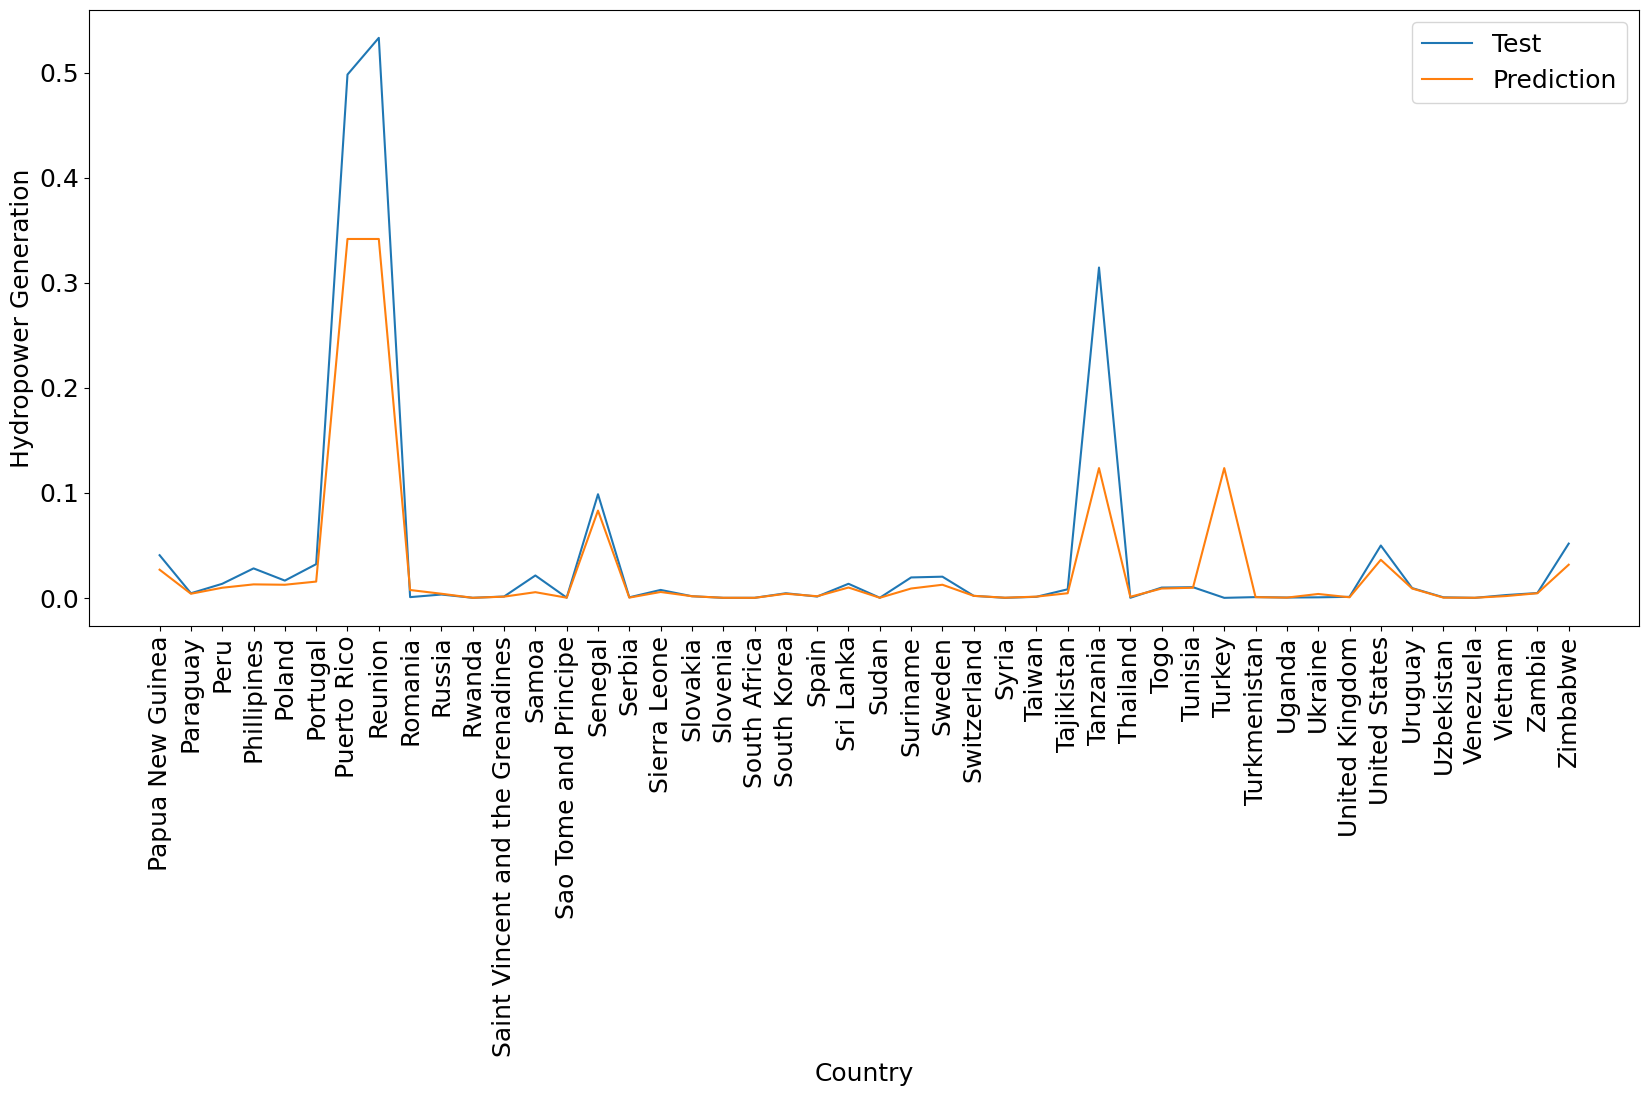

In [ ]:
plt.rcParams.update({'font.size': 18});
plt.figure(figsize=(20, 8));
plt.plot(data_prediction.index, data_prediction.Test, label="Test");
plt.plot(data_prediction.index, data_prediction.Prediction, label="Prediction");
plt.xticks(rotation=90);
plt.legend(loc="upper right");
plt.xlabel("Country");
plt.ylabel("Hydropower Generation");

- Nótese que el conjunto de prueba para este ejemplo fue tomado como, el `último 30% de nuestras observaciones`, lo cual corresponde a los `últimos 46 países` (observaciones) existentes en nuestro dataset. En la sección dedicada a la `evaluación de modelos`, se abordarán técnicas especificas para que `pliegues de prueba sean repartidos proporcionalmente en todas las posiciones posibles en nuestro data set`, usando la librería `KFold`, así como también hiperparametrización usando `GridSearch`.

```{admonition} Puntos fuertes, puntos débiles y parámetros
:class: tip

- En principio, hay `dos parámetros importantes` en el clasificador `KNeighbors`: el `número de vecinos` y `cómo se mide la distancia entre los puntos de datos`. En la práctica, utilizar `un número pequeño de vecinos, como tres o cinco, suele funcionar bien, pero se debería ajustar este parámetro`. 

- La elección de la `medida de distancia correcta es también crucial`. Por defecto, `KNeighbors` utiliza la `distancia euclidiana`, que funciona bien en muchos casos. Uno de los puntos fuertes de $k$-NN es que `el modelo es muy fácil de entender`, y a menudo da un rendimiento razonable sin necesidad de muchos ajustes. El uso de este algoritmo es un buen `método de referencia para probar, antes de considerar técnicas más avanzadas`.

- La construcción del modelo de vecinos más cercanos suele ser muy rápida, pero `cuando el conjunto de entrenamiento es muy grande (ya sea en número de características o en número de muestras) la predicción puede ser lenta`. Cuando se utiliza el algoritmo $k$-NN, es importante `pre-procesar los datos`, tema que revisaremos en secciones posteriores. Este enfoque `no suele funcionar bien en conjuntos de datos con muchas características (cientos o más)`, y `lo hace especialmente mal con conjuntos de datos en los que la mayoría de las características son 0 la mayor parte del tiempo (los llamados conjuntos de datos dispersos`). 

- Por lo tanto, aunque el algoritmo de $k$`-vecinos más cercanos` es fácil de entender, `no se utiliza a menudo en la práctica, debido a que la predicción es lenta y a su incapacidad para manejar muchas características`.
```